Este conjunto de datos contiene información sobre automóviles usados.
Estos datos se pueden utilizar para muchos propósitos, como la predicción de precios, para ejemplificar el uso de la regresión lineal en el aprendizaje automático.
Las columnas del conjunto de datos proporcionado son las siguientes:

* nombre
* año
* precio de venta
* km_impulsado
* combustible
* tipo_vendedor
* transmisión
* Dueño

### Conexion Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (7, 4)

pd.options.display.max_columns = None
sns.set_style('whitegrid')
color = sns.color_palette()

## Rutas

In [4]:
#Repositorios
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
filename = "car_prediction.csv"
fullpath = os.path.join(path, filename)

# Lectura de datos

In [5]:
df = pd.read_csv(fullpath)

In [6]:
print(df.shape)
df.head(3)

(301, 9)


Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0

# Data Wrangling

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# Validamos si los tipos de variables son los adecuados

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df['Age'] = 2024-df['Year']
df.drop('Year',axis=1,inplace=True)

In [11]:
df['Car_Name'].nunique()

98

In [12]:
# Eliminamos el car_name
df.drop('Car_Name',axis=1,inplace=True)

In [13]:
target = 'Selling_Price'
columnsNumeric = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
columnsString = ['Age','Fuel_Type','Seller_Type','Transmission','Owner']

# **I. Analisis Exploratorio**

In [14]:
df.describe().T

count          mean           std     min      25%      50%  \
Selling_Price  301.0      4.661296      5.082812    0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.644115    0.32      1.2      6.4   
Kms_Driven     301.0  36947.205980  38886.883882  500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915    0.00      0.0      0.0   
Age            301.0     10.372093      2.891554    6.00      8.0     10.0   

                   75%       max  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Kms_Driven     48767.0  500000.0  
Owner              0.0       3.0  
Age               12.0      21.0

In [15]:
df.describe(include='object')

Fuel_Type Seller_Type Transmission
count        301         301          301
unique         3           2            2
top       Petrol      Dealer       Manual
freq         239         195          261

## Revision Objetivo

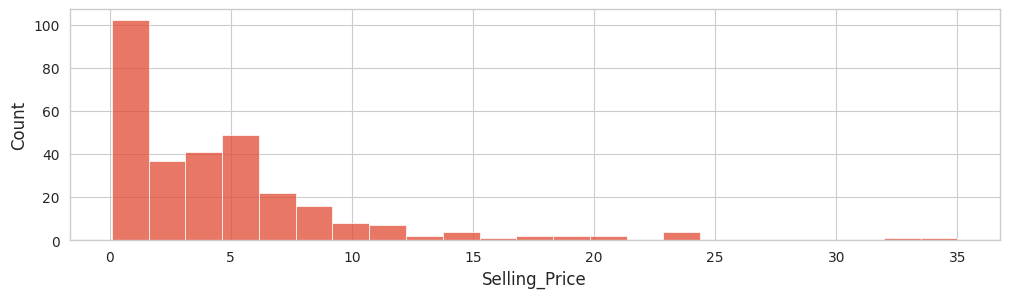

In [16]:
plt.figure(figsize=(12,3))
sns.histplot(x=target, data=df);

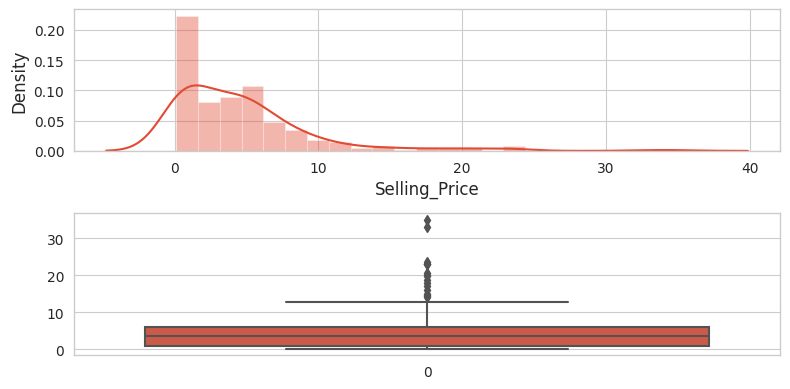

In [17]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(2,1,1)
sns.distplot(df[target])
fig.add_subplot(2,1,2)
sns.boxplot(df[target])
plt.tight_layout()

## Analisis Univariado

### Categoricas

Age
6      1
7     35
8     50
9     61
10    38
11    33
12    23
13    19
14    15
15     6
16     7
17     2
18     4
19     4
20     1
21     2
dtype: int64


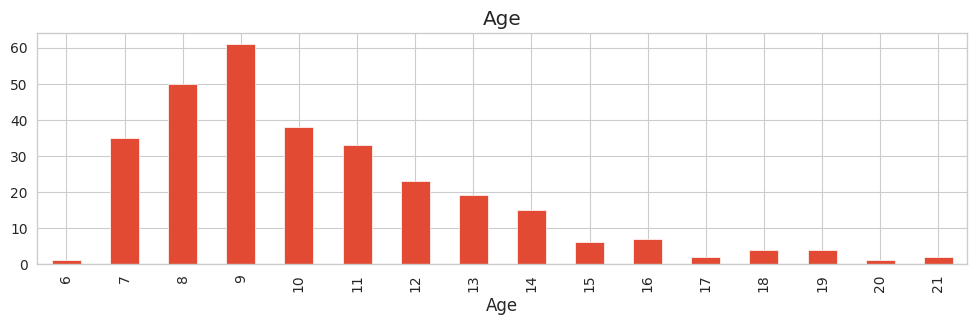

Fuel_Type
CNG         2
Diesel     60
Petrol    239
dtype: int64


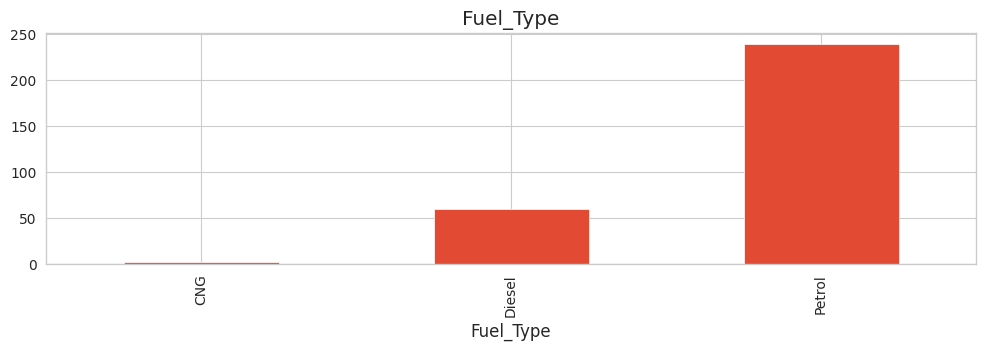

Seller_Type
Dealer        195
Individual    106
dtype: int64


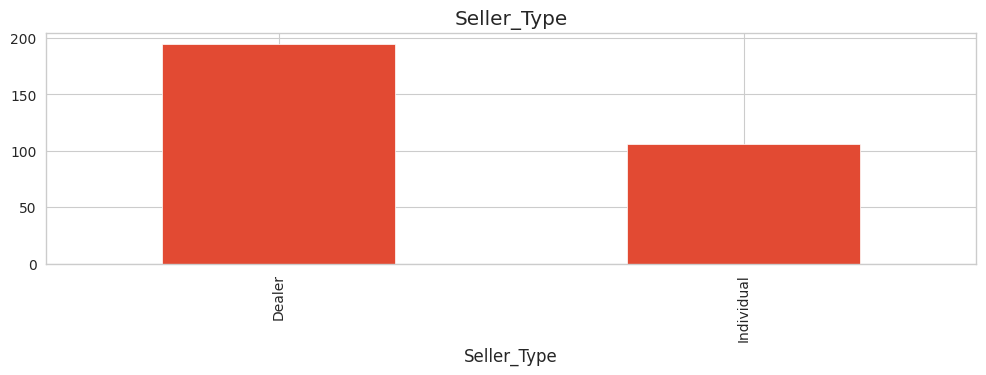

Transmission
Automatic     40
Manual       261
dtype: int64


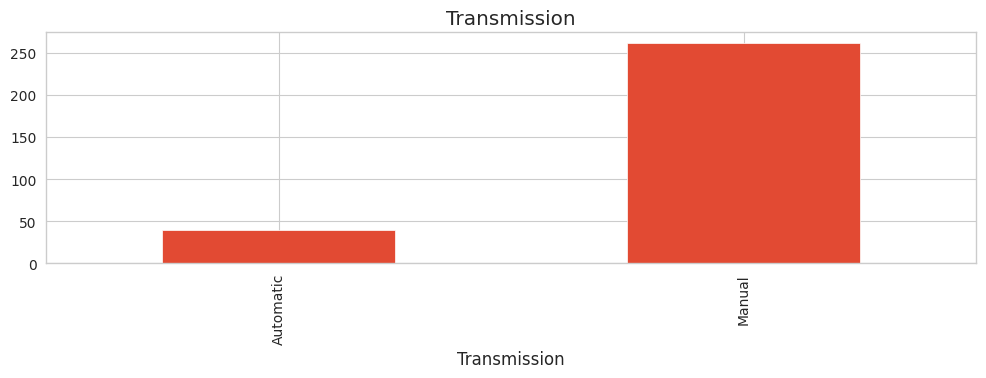

Owner
0    290
1     10
3      1
dtype: int64


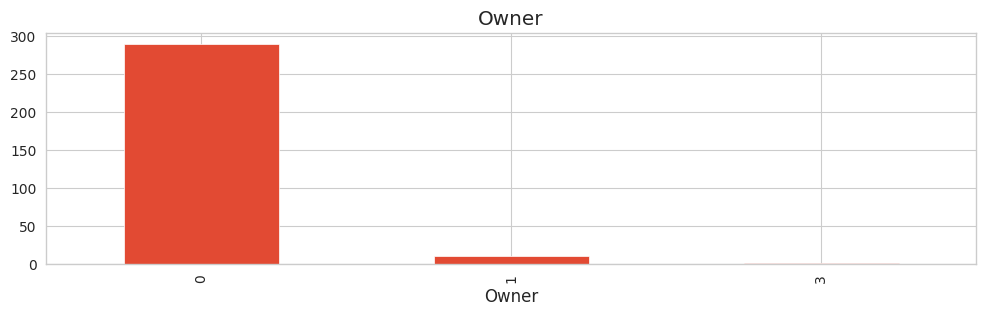

In [18]:
for x in columnsString:
  plt.figure(figsize=(12,3))
  print(df.groupby(x).size())
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

Conclusión:
* Hay 3 categorías Fuel_Type. La gasolina tiene la mayor frecuencia y el GNC la menor.
* Hay 2 categorías Seller_Type. El distribuidor tiene la frecuencia más alta y el individuo tiene la frecuencia más baja.
* Hay 2 categorías de Transmisión. Manual tiene la frecuencia más alta y Automático tiene la frecuencia más baja.

### Numericas

In [19]:
df[columnsNumeric].describe().T

count          mean           std     min      25%      50%  \
Age            301.0     10.372093      2.891554    6.00      8.0     10.0   
Selling_Price  301.0      4.661296      5.082812    0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.644115    0.32      1.2      6.4   
Kms_Driven     301.0  36947.205980  38886.883882  500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915    0.00      0.0      0.0   

                   75%       max  
Age               12.0      21.0  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Kms_Driven     48767.0  500000.0  
Owner              0.0       3.0

In [20]:
df.groupby(target).median() # Mediana no se ve afectada con valores atípicos

Present_Price  Kms_Driven  Owner   Age
Selling_Price                                        
0.10                    0.75     92233.0    0.0  18.0
0.12                    0.58     53000.0    0.0  17.0
0.15                    0.57     35000.0    1.0  13.0
0.16                    0.51     33000.0    0.0  14.0
0.17                    0.52    500000.0    0.0  16.0
...                      ...         ...    ...   ...
20.75                  25.39     29000.0    0.0   8.0
23.00                  30.61     40000.0    0.0   9.0
23.50                  35.96     47000.0    0.0   9.0
33.00                  36.23      6000.0    0.0   7.0
35.00                  92.60     78000.0    0.0  14.0

[156 rows x 4 columns]

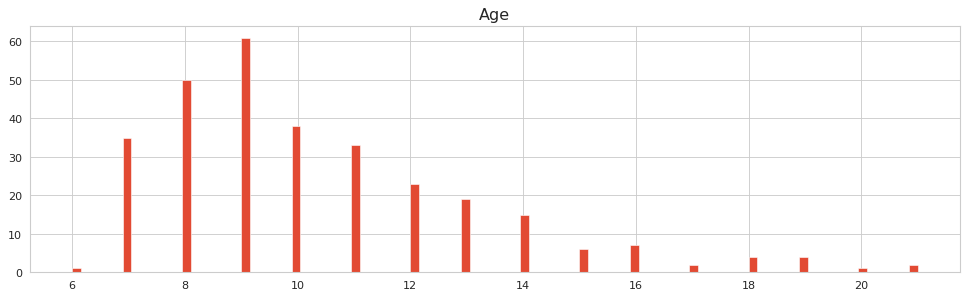

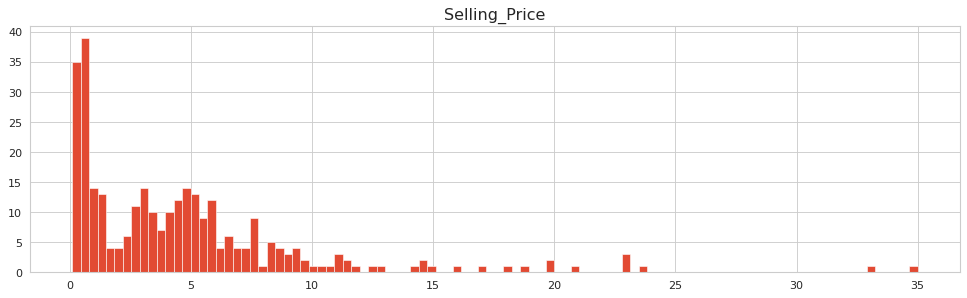

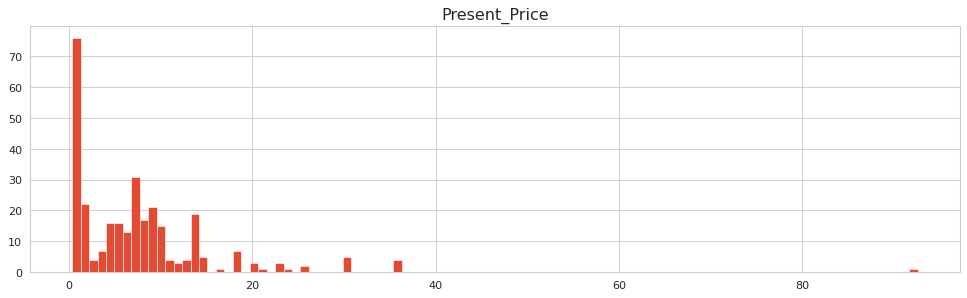

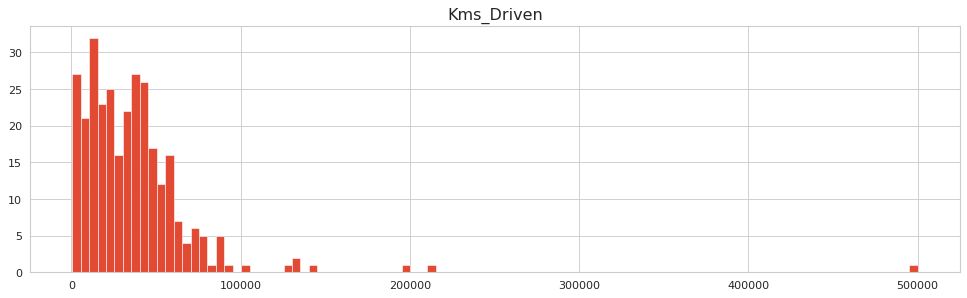

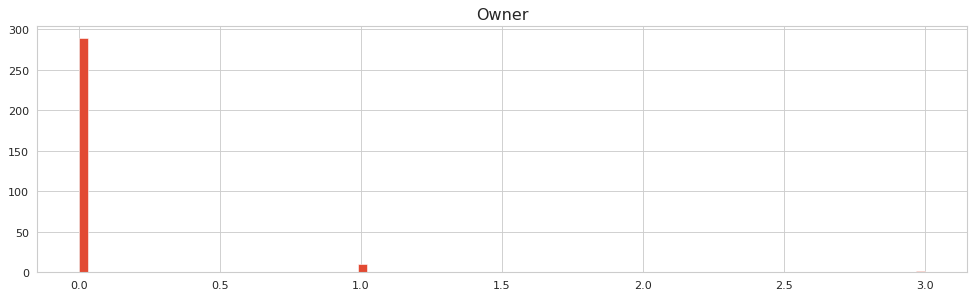

In [21]:
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  plt.hist(df[x],bins=100)
  plt.show()

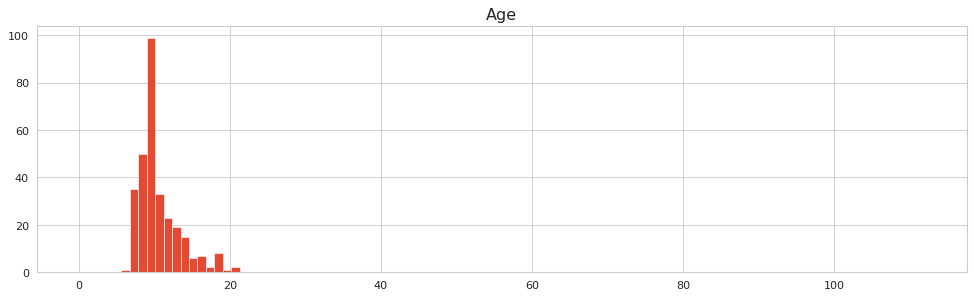

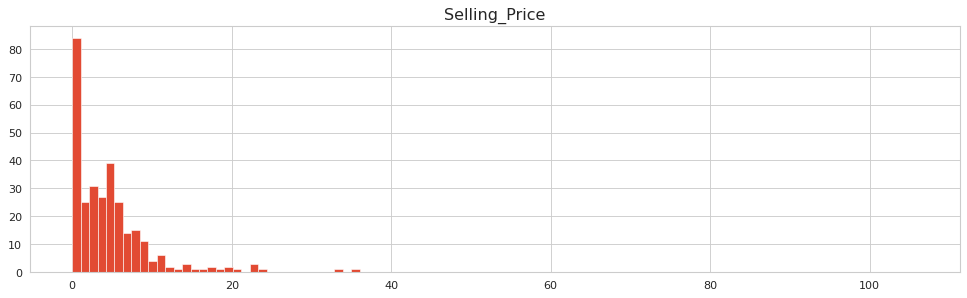

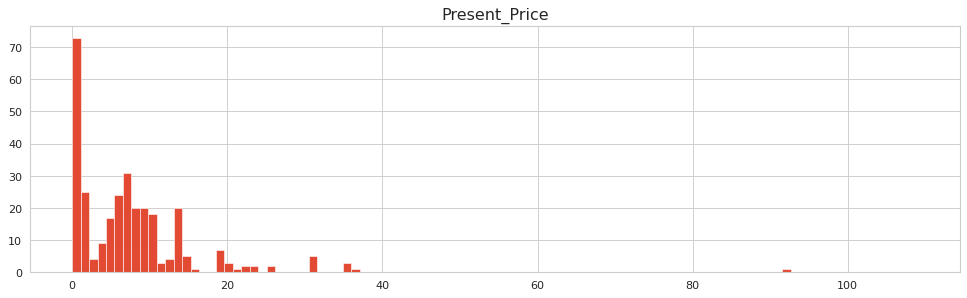

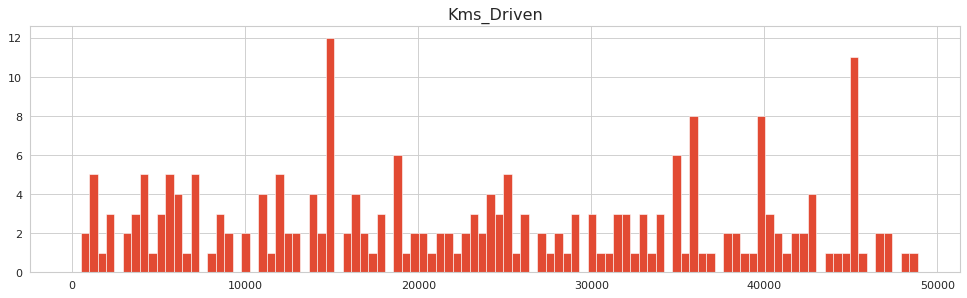

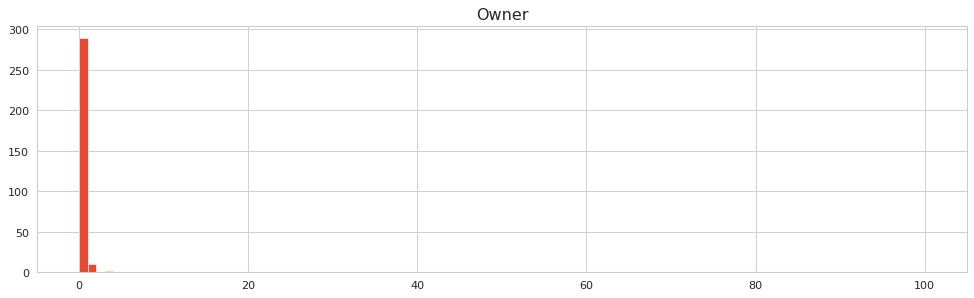

In [22]:
# No consideramos las colas (outliers) para ver mejor la distribucion
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  Q03= int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x],bins=100,range=(0,Q03))
  plt.show()

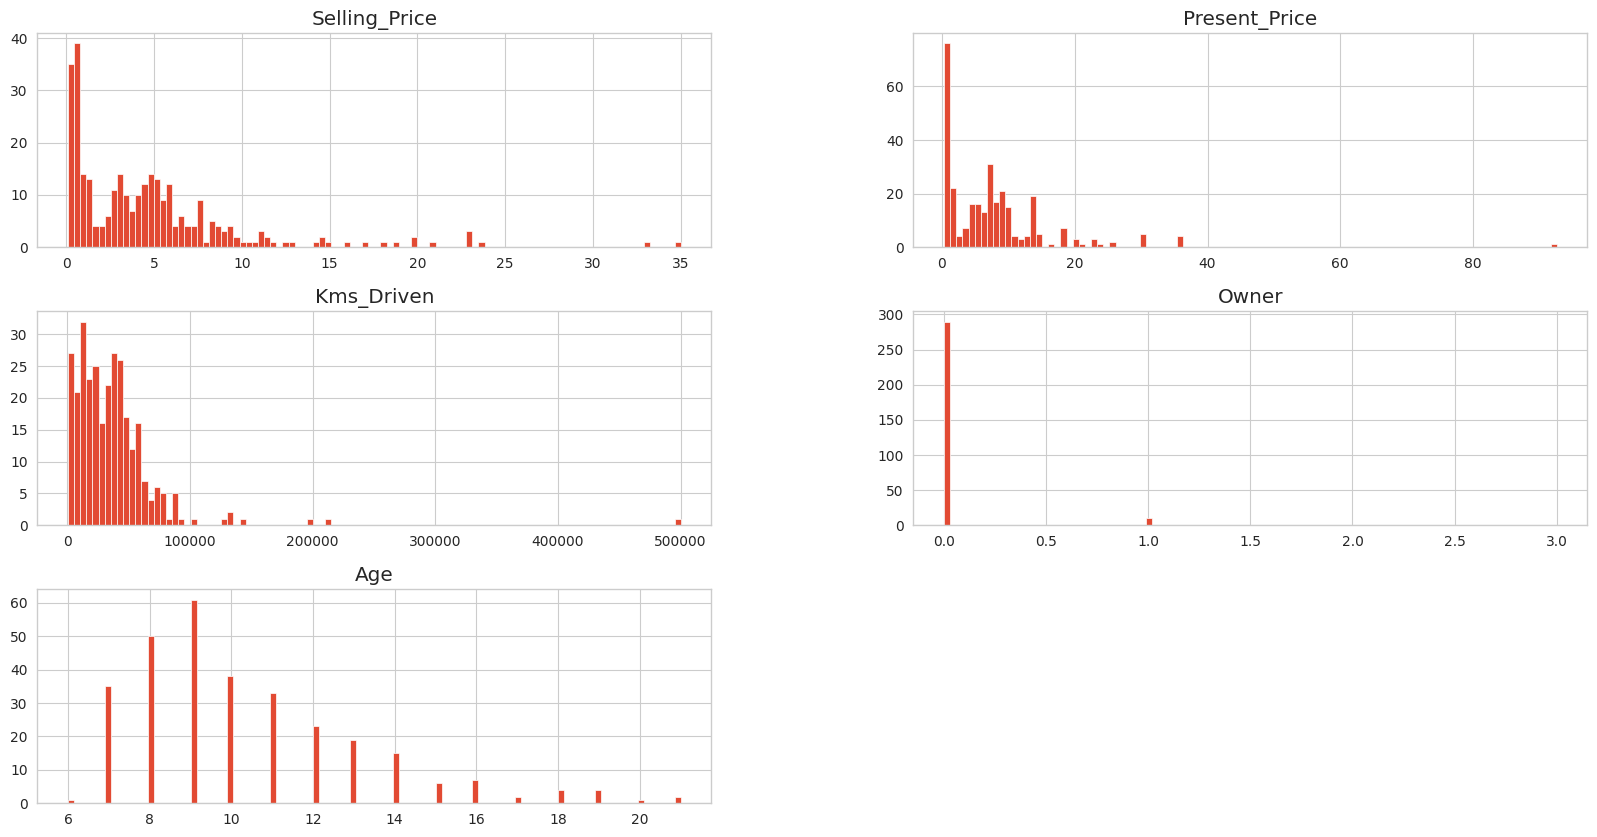

In [23]:
df.hist(bins=100,figsize=(20,10));

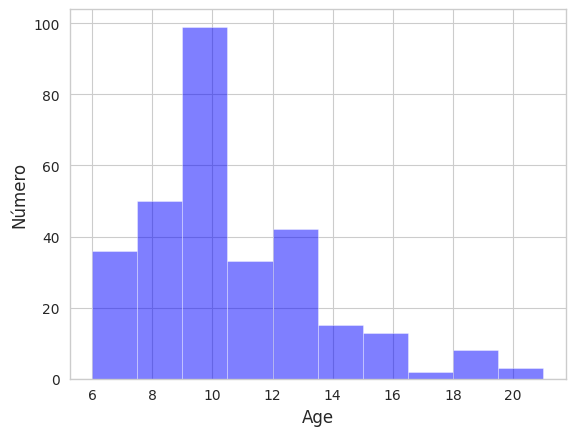

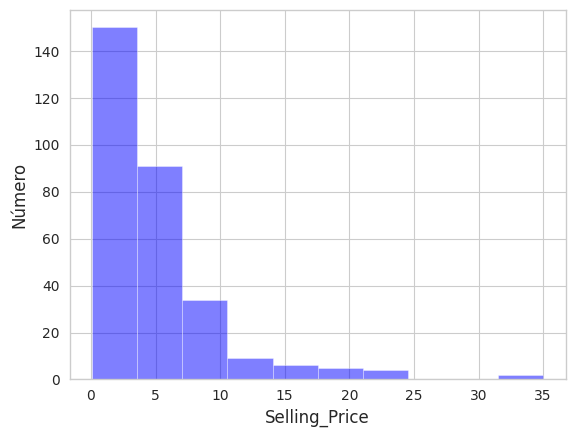

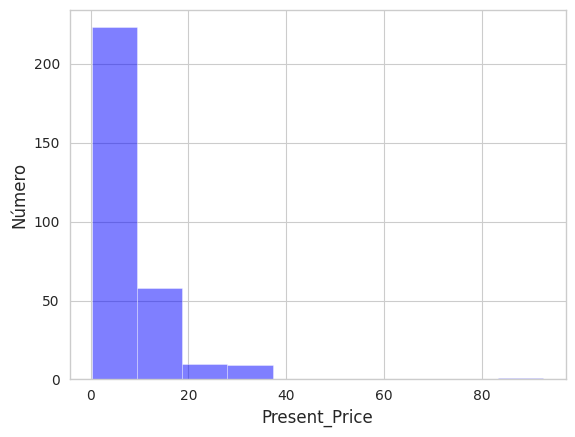

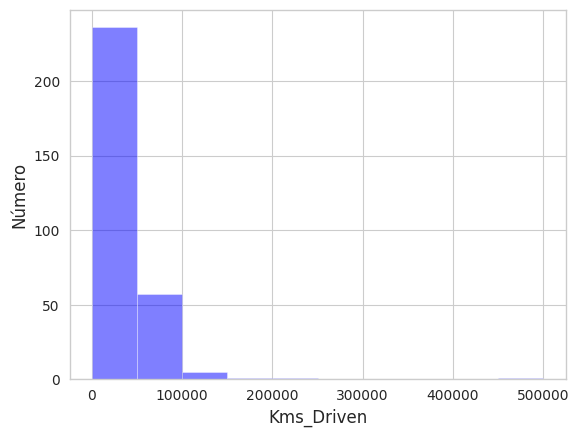

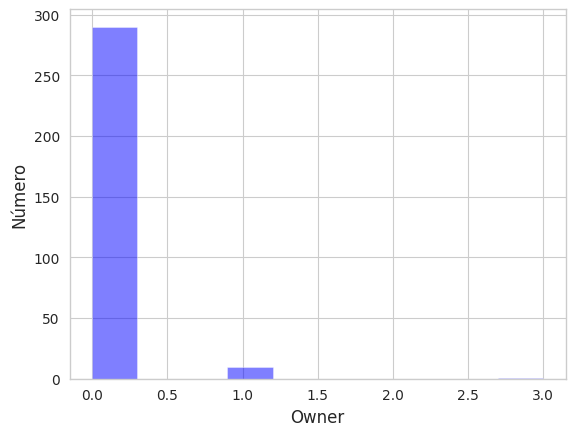

In [24]:
num_bins = 10
data_0 = df

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

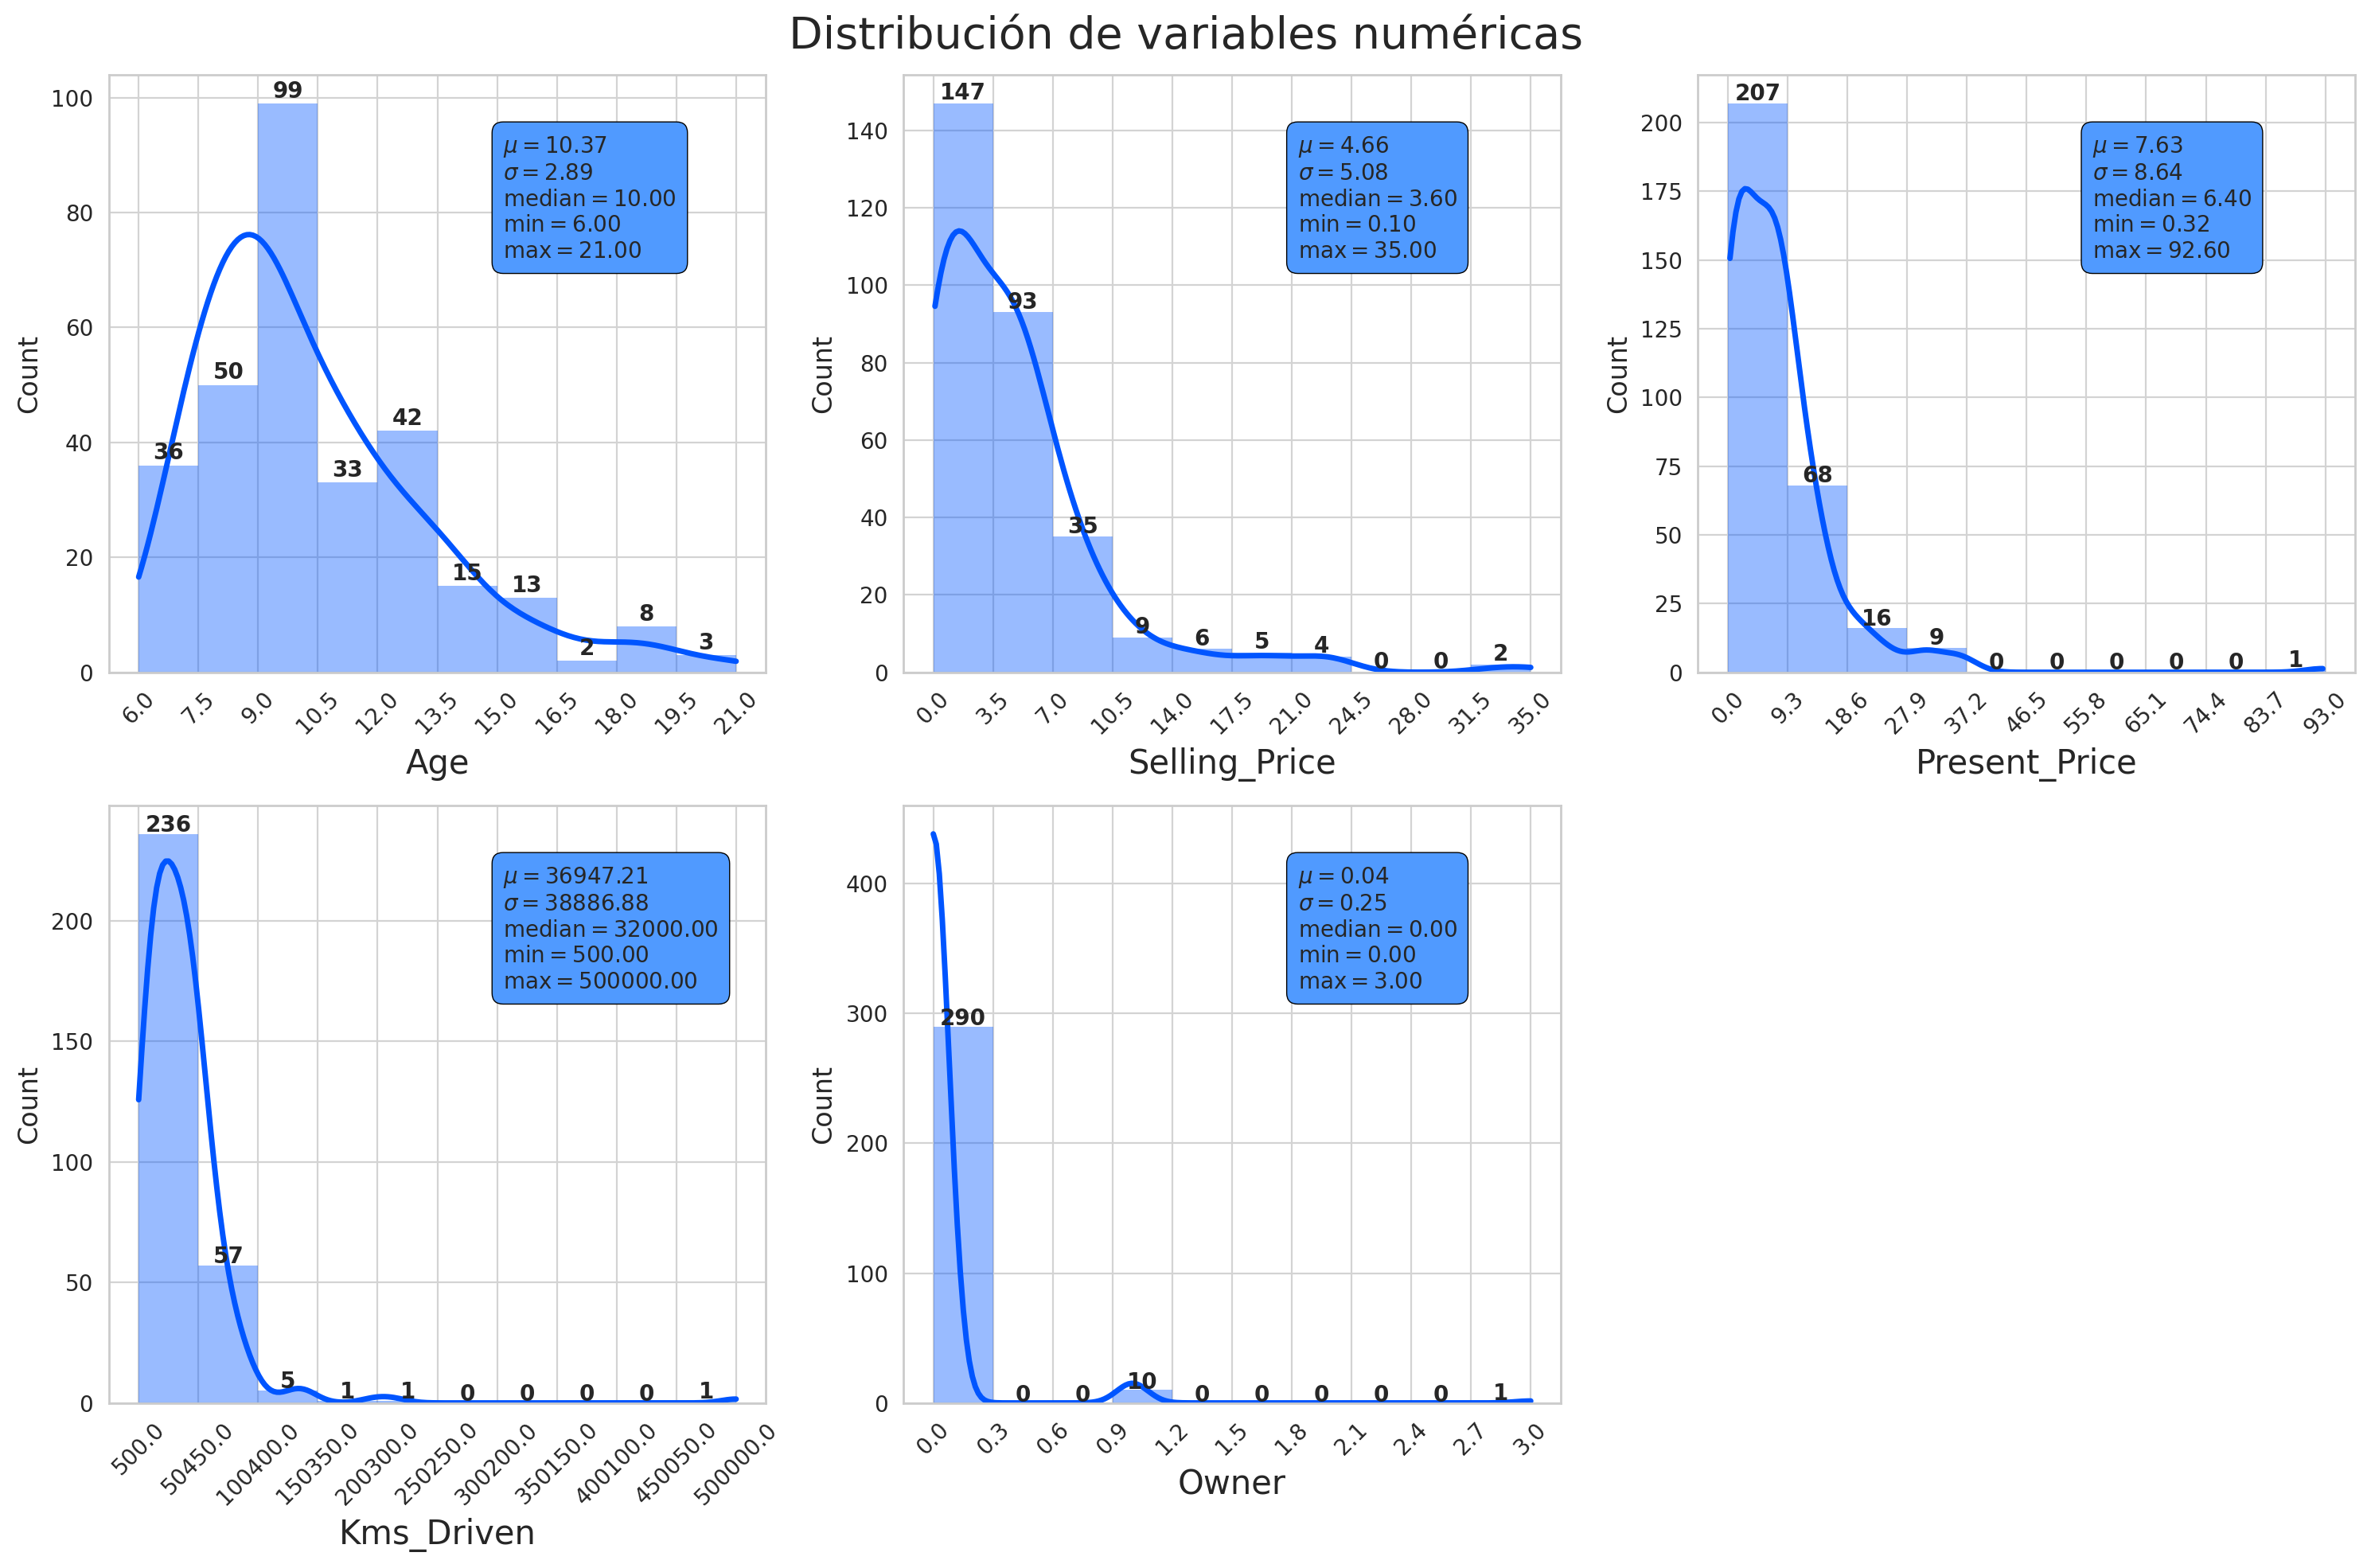

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(columnsNumeric)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df[columnsNumeric[i]],
                                     range=(np.floor(df[columnsNumeric[i]].min()), np.ceil(df[columnsNumeric[i]].max())))
    graph = sns.histplot(data=df, x=columnsNumeric[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(columnsNumeric[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %df[columnsNumeric[i]].mean(),
    r'$\sigma=%.2f$' %df[columnsNumeric[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df[columnsNumeric[i]]),
    r'$\mathrm{min}=%.2f$' %df[columnsNumeric[i]].min(),
    r'$\mathrm{max}=%.2f$' %df[columnsNumeric[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribución de variables numéricas', fontsize=20)
plt.tight_layout()
plt.show()

¡Las variables están muy sesgadas!

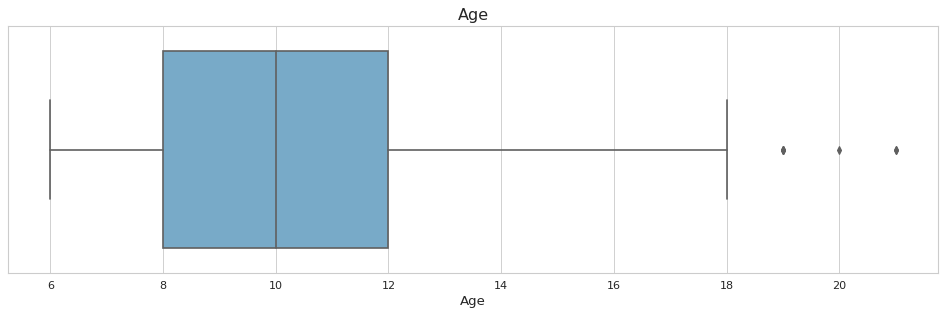

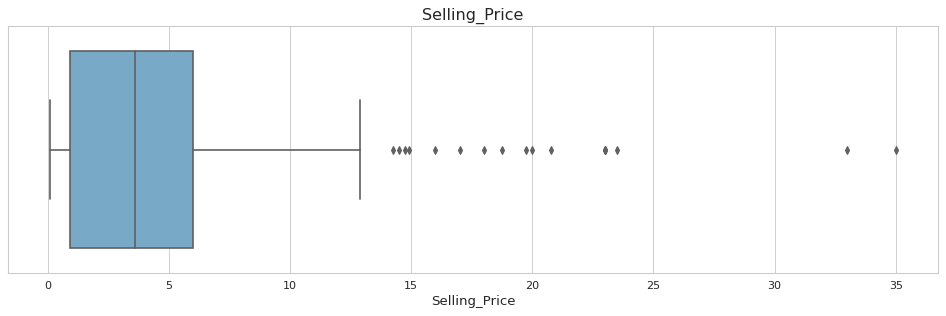

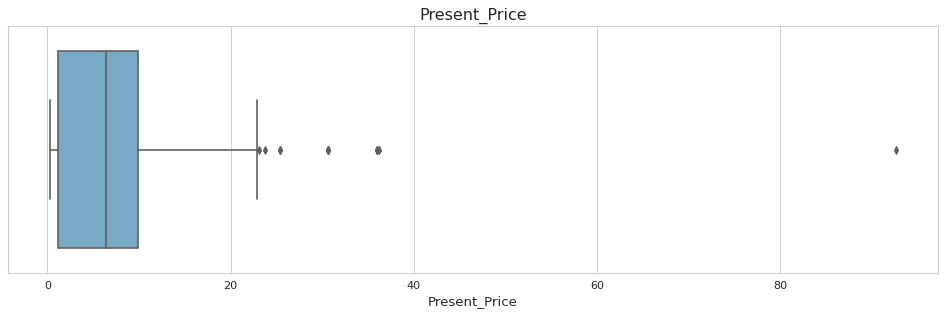

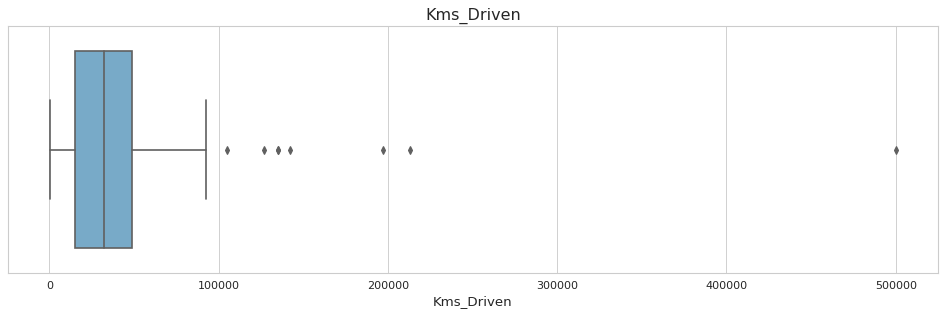

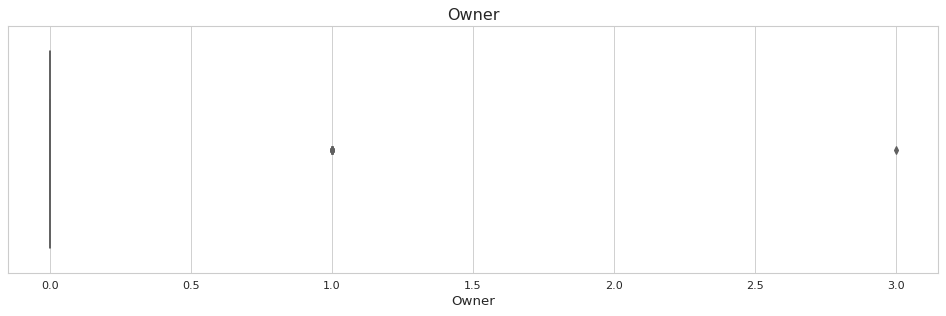

In [26]:
# Grafico de Cajas para revision de atipicos
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues")
  plt.show()

## Analisis Bivariado

In [27]:
columnsNumeric.remove(target)

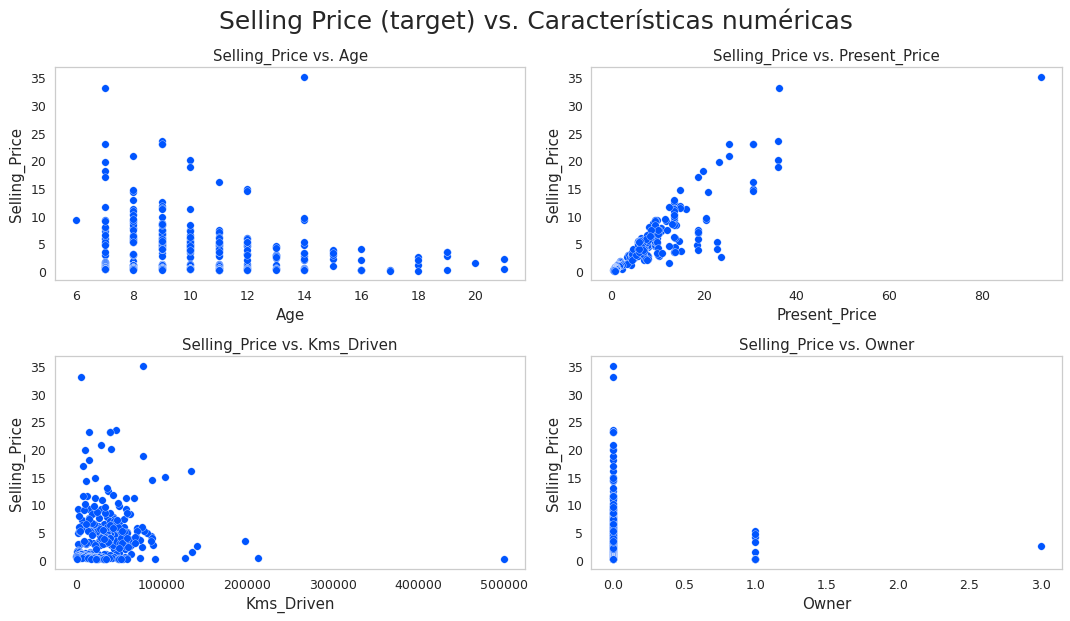

In [28]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(12,7), dpi=90)

c = '#0055ff'

for i in range(len(columnsNumeric)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df[columnsNumeric[i]], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, columnsNumeric[i]), size = 12)
    ax[row,col].set_xlabel(columnsNumeric[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price (target) vs. Características numéricas', size = 20)
plt.tight_layout()
plt.show()

In [29]:
columnsNumeric.append(target)

Conclusión:
+ A medida que aumenta el Precio_presente, el Precio_de_venta también aumenta. Entonces Precio_Venta es directamente proporcional al Precio_Presente.

+ A medida que aumentan los Kms_Driven del automóvil, su Precio_de venta disminuye. Entonces Precio_Venta es inversamente proporcional a Kms_Recorridos.

+ A medida que el automóvil envejece, su precio de venta disminuye. Entonces Precio_Venta es inversamente proporcional a la Edad del automóvil.

+ A medida que aumenta el número de propietarios de automóviles anteriores, su precio de venta disminuye. Entonces Precio_Venta es inversamente proporcional al Propietario.

In [30]:
columnsString

['Age', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [31]:
columnsString.remove('Age')
columnsString.remove('Owner')

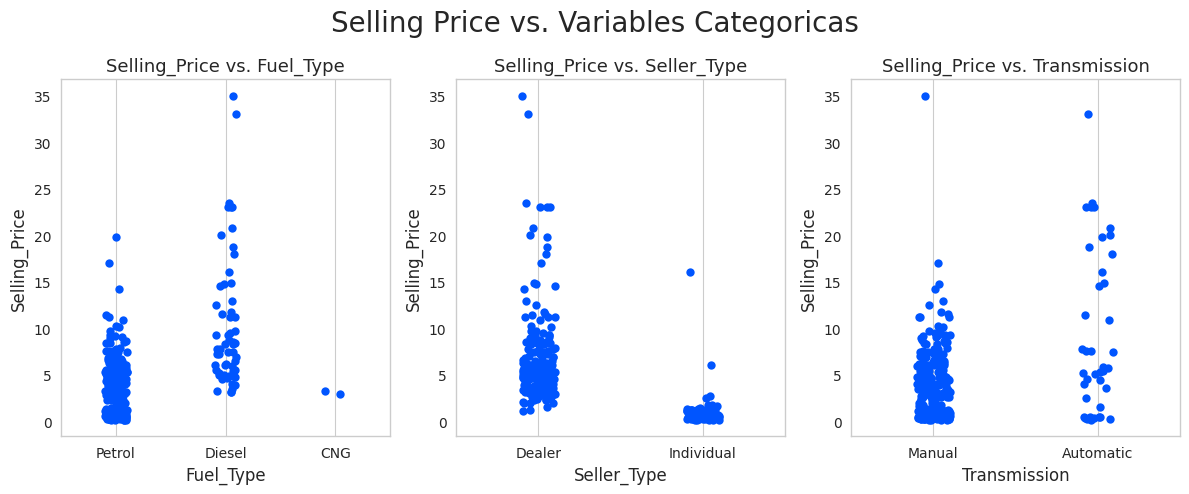

In [32]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
c = '#0055ff'

for i in range(len(columnsString)):
    sns.stripplot(ax=axes[i], x=columnsString[i], y=target, data=df, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, columnsString[i]), size = 13)
    axes[i].set_xlabel(columnsString[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Variables Categoricas', size = 20)
plt.tight_layout()
plt.show()

In [33]:
columnsString.append('Age')
columnsString.append('Owner')

Conclusión:
+ Coches diésel > Coches a GNC > Coches de gasolina en términos de Precio_de_venta.
+ El precio_de_venta de los automóviles vendidos por particulares es inferior al precio de los automóviles vendidos por los concesionarios.
+ Los coches automáticos son más caros que los manuales.

## Analisis Multivariado

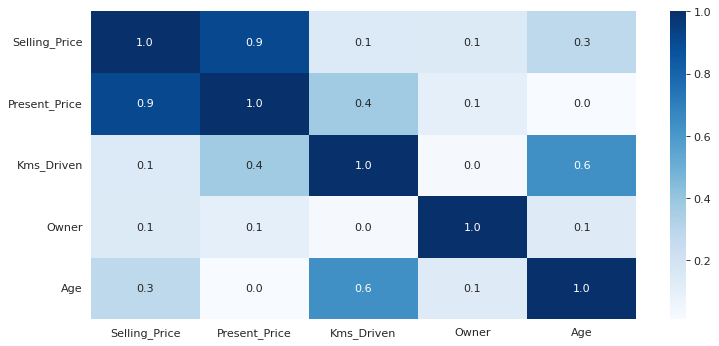

In [34]:
# Analizamos la correlacion de las variables
# Spearman: Para variables numericas. No asume normalidad
plt.figure(figsize=(11,5), dpi=80)
sns.heatmap(abs(df.corr(method='spearman')),annot=True,fmt='.1f',cmap='Blues')
plt.show()

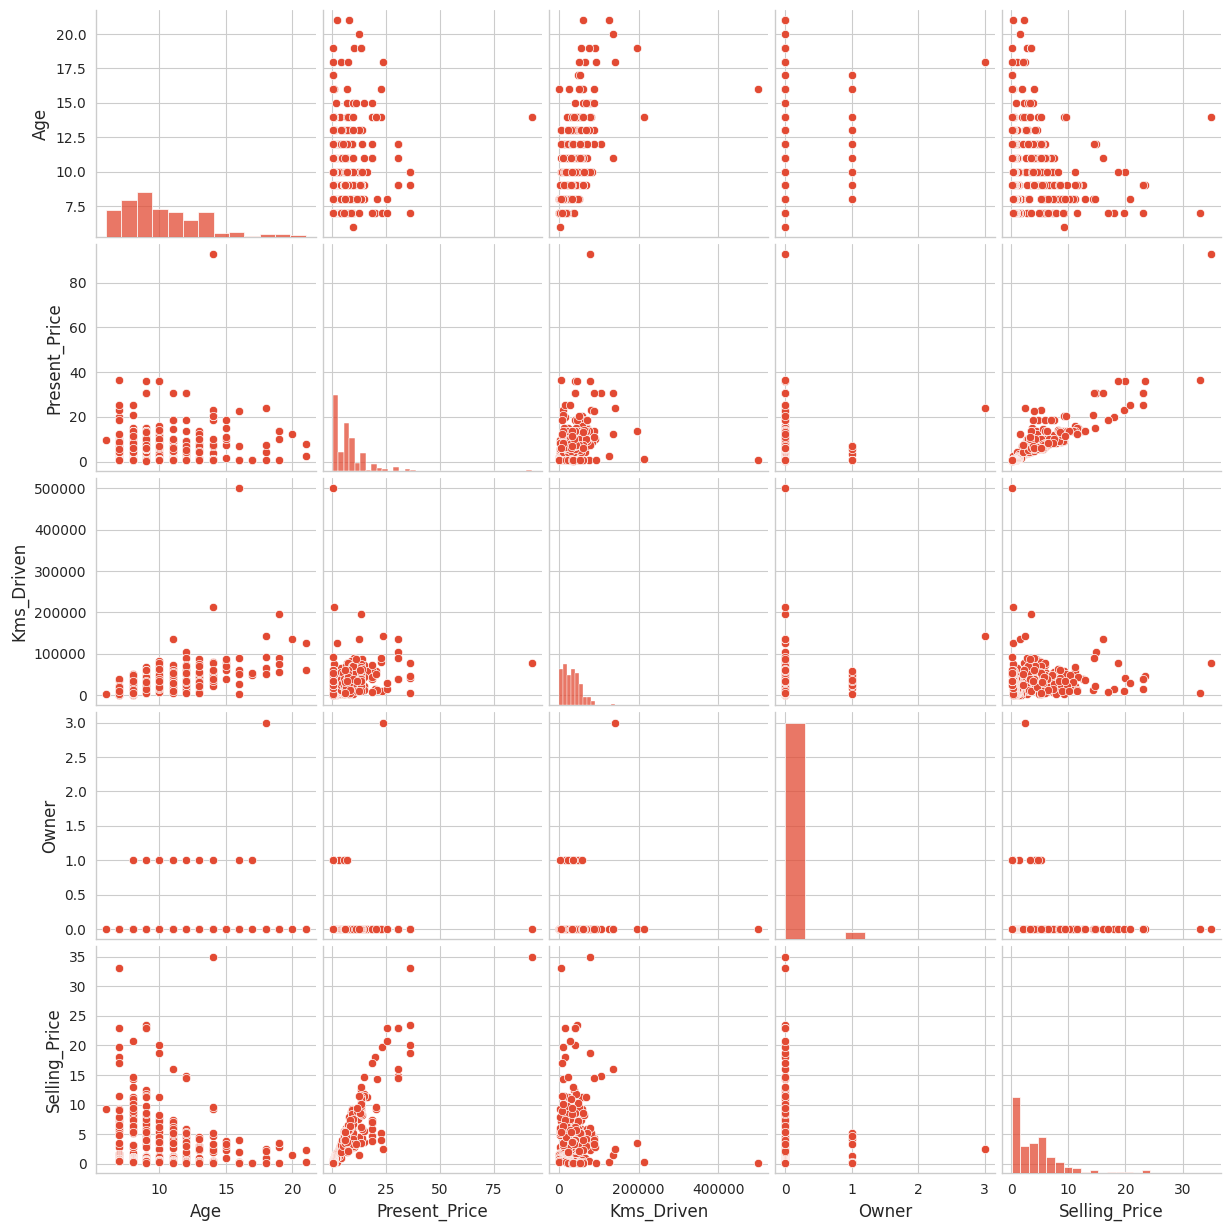

In [35]:
sns.pairplot(df[columnsNumeric])

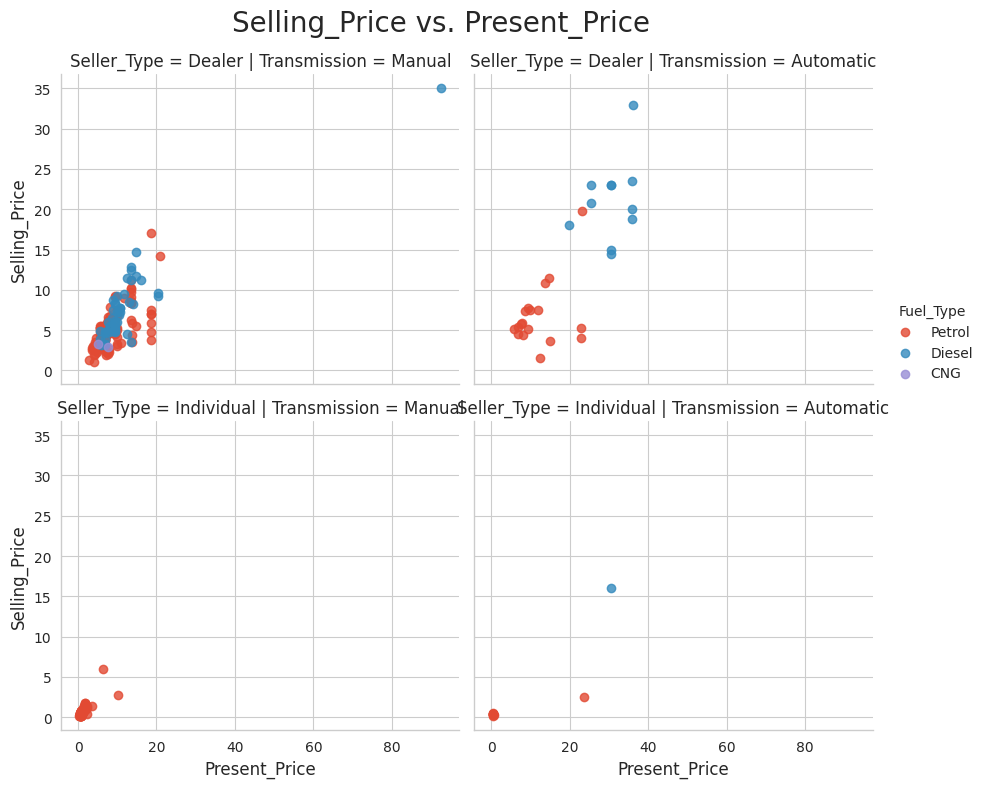

In [36]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type',  height=4, aspect=1)

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20)
sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.show()

# Linealidad

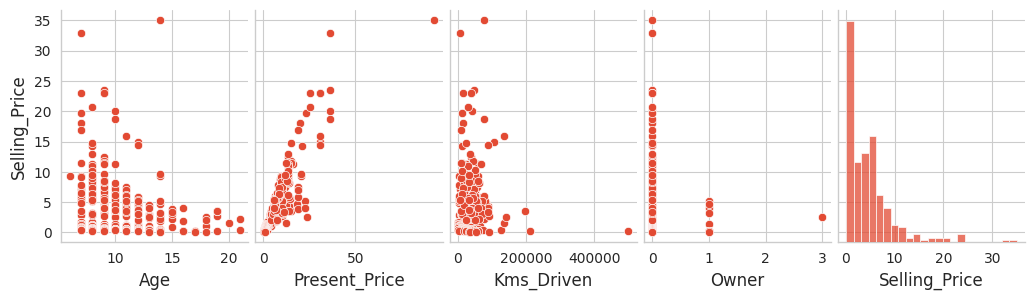

In [37]:
# Linealidad
p = sns.pairplot(df, x_vars = columnsNumeric,
                 y_vars=target, size=3, aspect=0.7)

<Axes: >

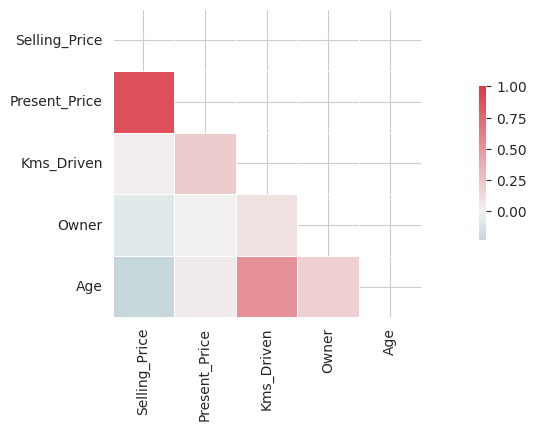

In [38]:
# Multicolinealidad
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[columnsNumeric].values, i) for i in range(df[columnsNumeric].shape[1])]
vif["features"] = df[columnsNumeric].columns
vif

VIF Factor       features
0    3.004096            Age
1    9.170203  Present_Price
2    2.584542     Kms_Driven
3    1.079773          Owner
4    8.310088  Selling_Price

## Asimetria

Calculamos el Coeficiente de Asimetría

In [41]:
from scipy import stats

In [42]:
data_ca = {'Variable' : columnsNumeric,
       'Coeficiente_Asim' : stats.skew(df[columnsNumeric])}
asim = pd.DataFrame(data_ca)
asim

Variable  Coeficiente_Asim
0            Age          1.239970
1  Present_Price          4.062774
2     Kms_Driven          6.403895
3          Owner          7.578839
4  Selling_Price          2.480979

## Tratamiento de Nulos

In [43]:
df.isnull().sum().sort_values(ascending=False)

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [44]:
df.isnull().sum()/df.shape[0]*100

Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
Age              0.0
dtype: float64

## Outliers

Usamos diagrama de caja para detectar valores atípicos:

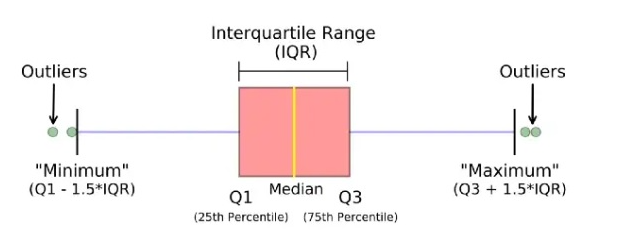

In [45]:
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,
                              df.select_dtypes(include='object').columns.values])
print(OrderedCols)

['Selling_Price' 'Present_Price' 'Kms_Driven' 'Owner' 'Age' 'Fuel_Type'
 'Seller_Type' 'Transmission']


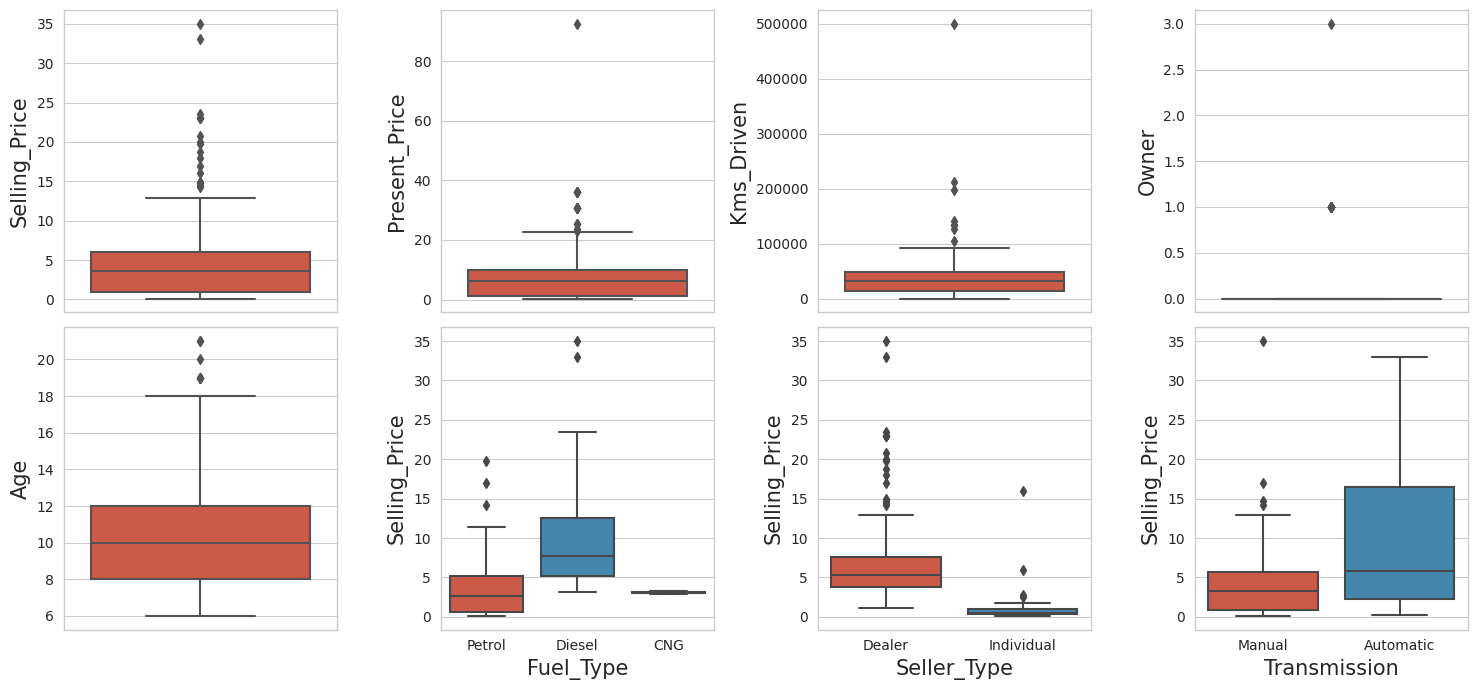

In [46]:
fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
  x= i//4
  y = i%4

  if i<5:
    sns.boxplot(data=df,y=col,ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)
  else:
    sns.boxplot(data=df,x=col,y=target,ax=ax[x,y])
    ax[x,y].xaxis.label.set_size(15)
    ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [47]:
outliers_indexes = []

# Para variables categoricas
for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())

# Para variables numericas
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

# Indices de los registros atipicos encontrados
outliers_indexes = list(set(outliers_indexes))
print('{} Se identificaron valores atípicos, cuyos índices son:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 Se identificaron valores atípicos, cuyos índices son:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


No es aceptable descartar una observación sólo porque sea un valor atípico. Pueden ser observaciones legítimas y es importante investigar la naturaleza del valor atípico antes de decidir si descartarlo o no. Se nos permite eliminar valores atípicos en dos casos:

* El valor atípico se debe a datos ingresados o medidos incorrectamente
* El valor atípico crea una asociación significativa

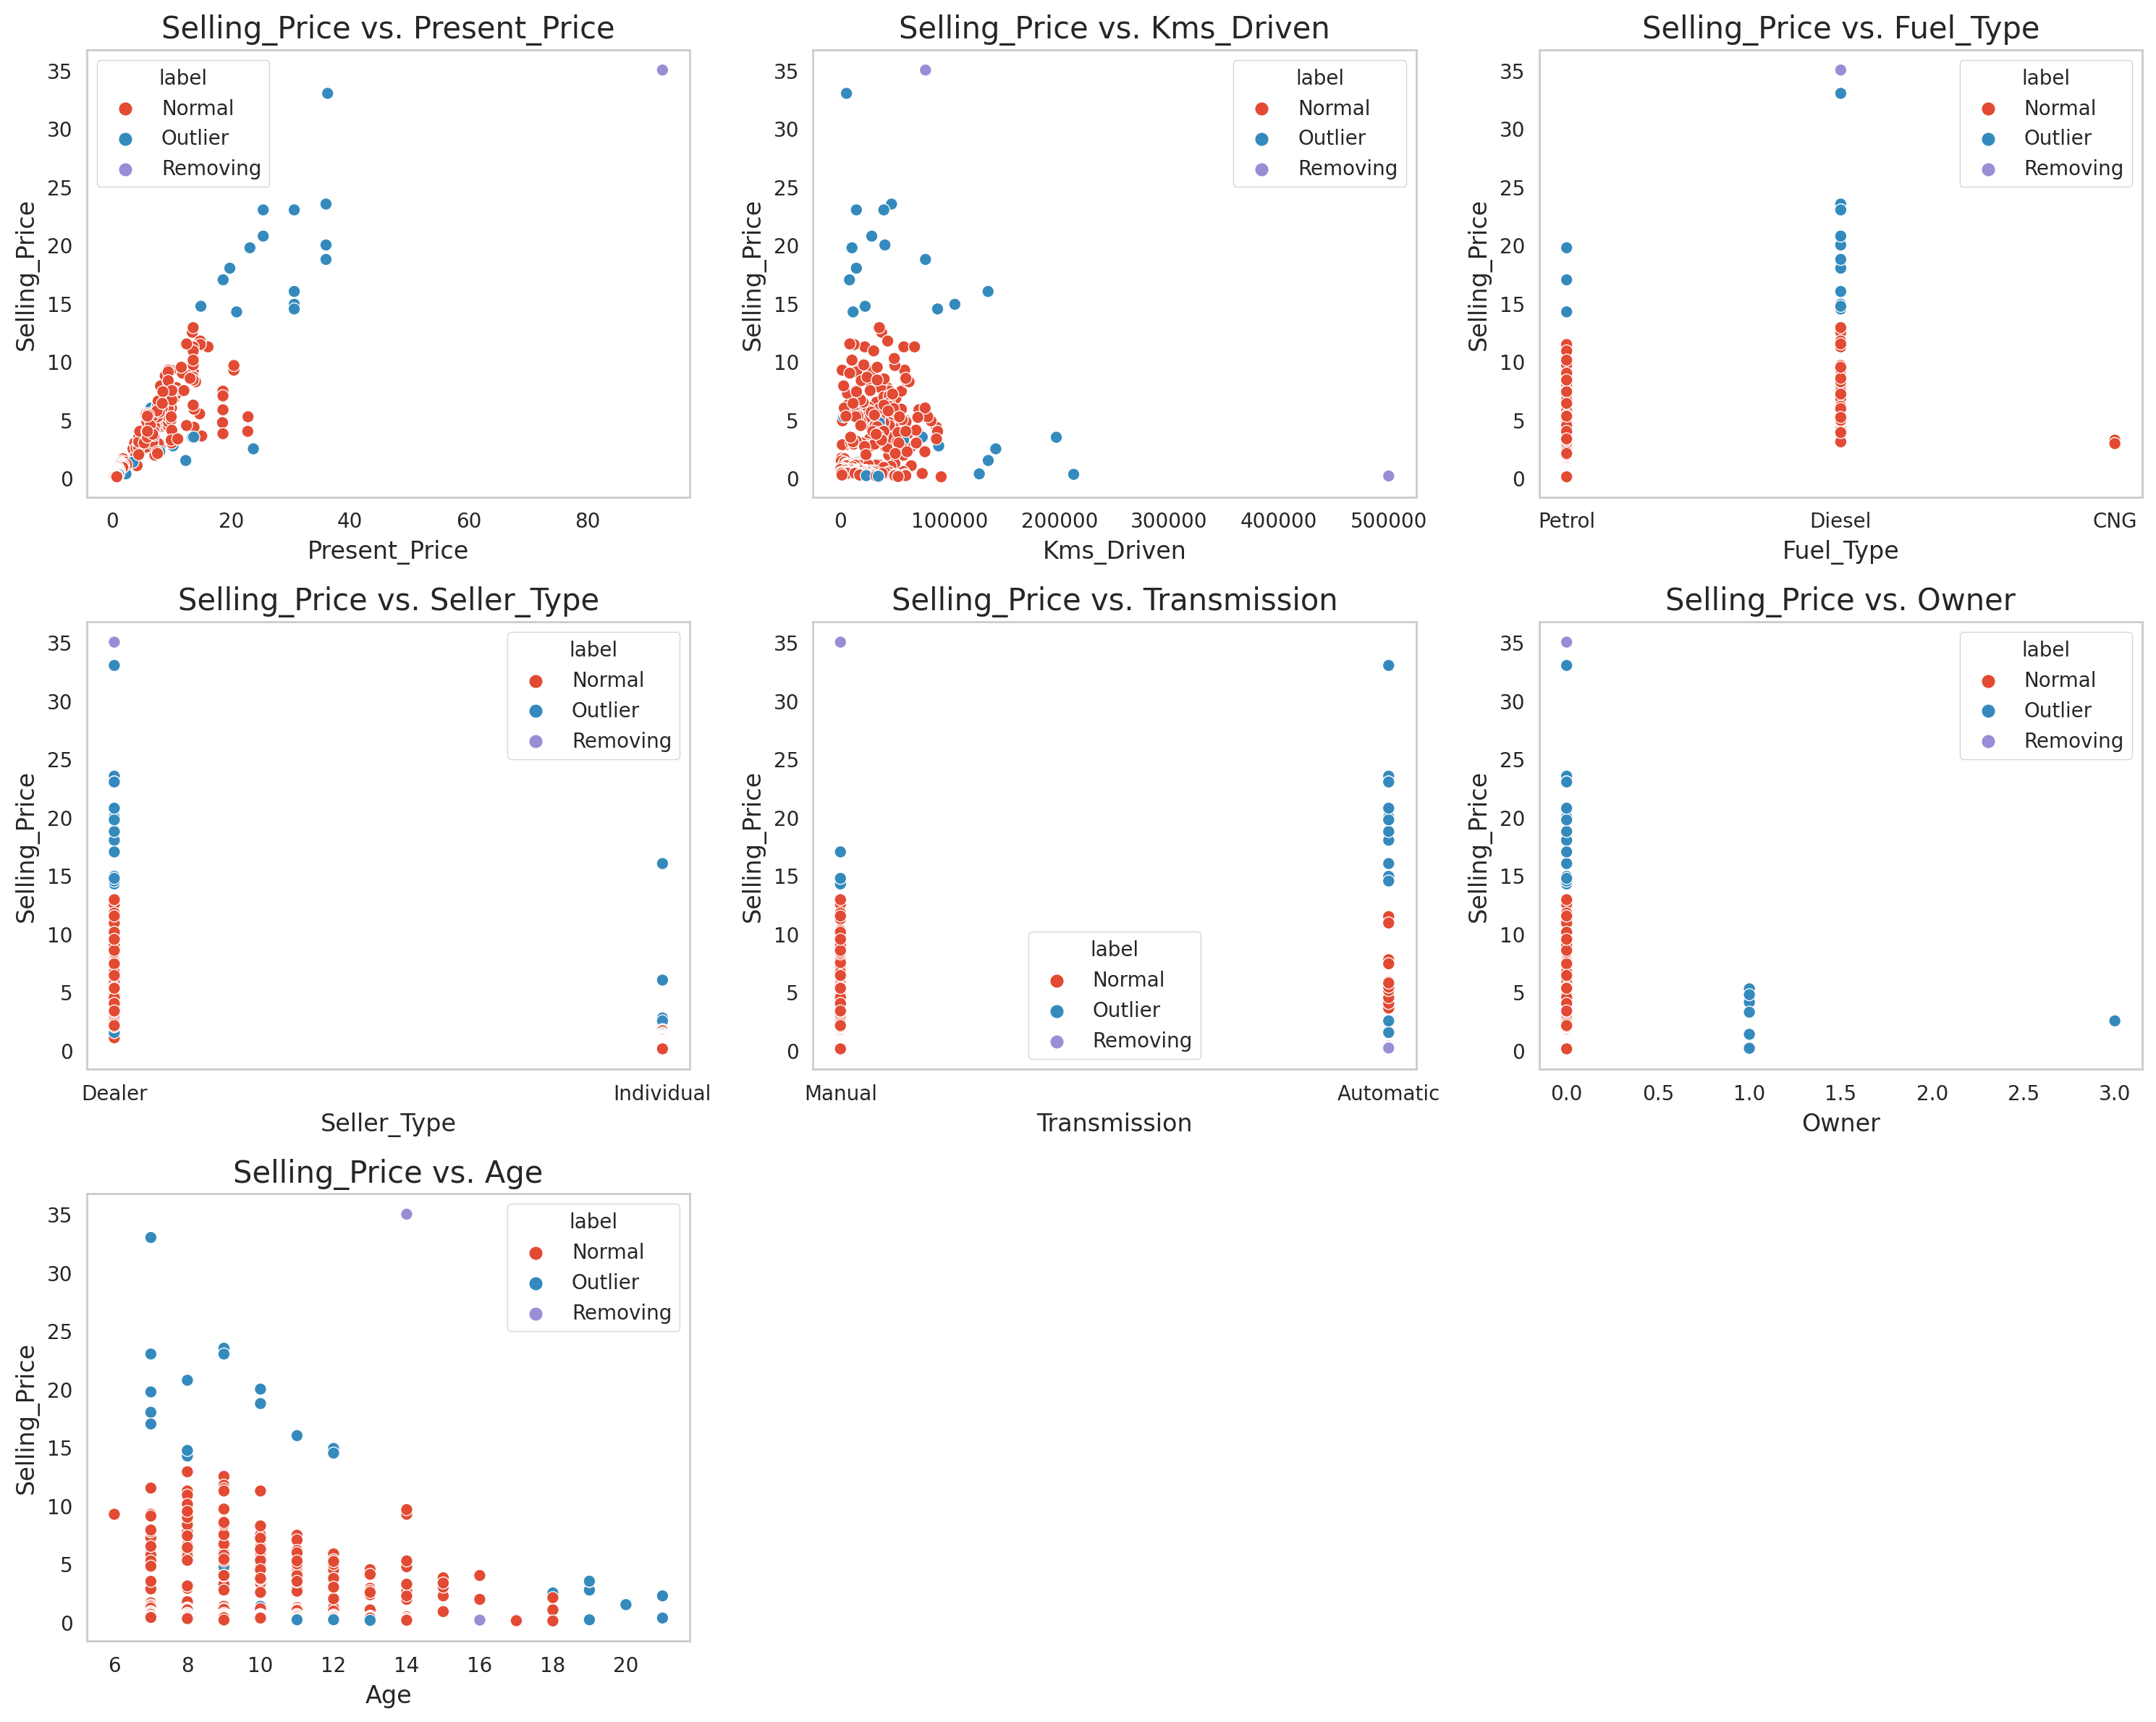

In [48]:
# Etiquetado de valores atípicos
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Eliminación de valores atípicos
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
features = df.columns.drop(target)
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

Los valores atípicos que se eliminarán estarán relacionados con los siguientes índices:

In [49]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

In [50]:
df.drop(removing_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
print(df.shape)
df.head(3)

(299, 8)


Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   

  Transmission  Owner  Age  
0       Manual      0   10  
1       Manual      0   11  
2       Manual      0    7

## Duplicates

In [52]:
df[df.duplicated(keep=False)]

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
15           7.75          10.79       43000    Diesel      Dealer   
17           7.75          10.79       43000    Diesel      Dealer   
51          23.00          30.61       40000    Diesel      Dealer   
92          23.00          30.61       40000    Diesel      Dealer   

   Transmission  Owner  Age  
15       Manual      0    8  
17       Manual      0    8  
51    Automatic      0    9  
92    Automatic      0    9

In [53]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [54]:
print(df.shape)
df.head(3)

(297, 8)


Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   

  Transmission  Owner  Age  
0       Manual      0   10  
1       Manual      0   11  
2       Manual      0    7

# **II. Recodificacion Data**

In [55]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

In [56]:
df = pd.get_dummies(df, columns=CatCols, drop_first=True)
print(df.shape)
df.head(5)

(297, 9)


Selling_Price  Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0   10                 0   
1           4.75           9.54       43000      0   11                 1   
2           7.25           9.85        6900      0    7                 0   
3           2.85           4.15        5200      0   13                 0   
4           4.60           6.87       42450      0   10                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

## Correlacion

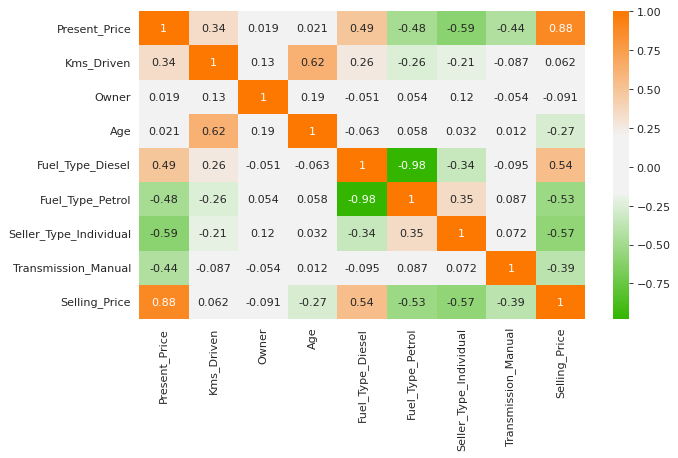

In [57]:
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 5), dpi=80)
ax = sns.heatmap(pd.concat([df.drop(target,axis=1), df[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

Conclusiones

+ La variable objetivo "Precio de venta" está altamente correlacionada con Precio_presente, Tipo_vendedor y Tipo_combustible.
+ Algunas variables independientes como Fuel_Type_Petrol y Fuel_Type_Disel están altamente correlacionadas, lo que se denomina multicolinealidad.

# **IV. Modelado**

In [58]:
df.head(3)

Selling_Price  Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0   10                 0   
1           4.75           9.54       43000      0   11                 1   
2           7.25           9.85        6900      0    7                 0   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1

## Particion Data

In [59]:
X = df.drop(target,axis=1)
y = df[target]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (207, 8)
X_test shape:  (90, 8)
y_train shape:  (207,)
y_test shape:  (90,)


In [63]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [64]:
CV = []
R2_train = []
R2_test=[]

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

## Regresion Lineal

In [65]:
from sklearn.linear_model import LinearRegression

Train R2-score : 0.88
Test R2-score : 0.88
Train CV scores : [0.86657929 0.8994174  0.89425508 0.75076916 0.80171591]
Train CV mean : 0.84


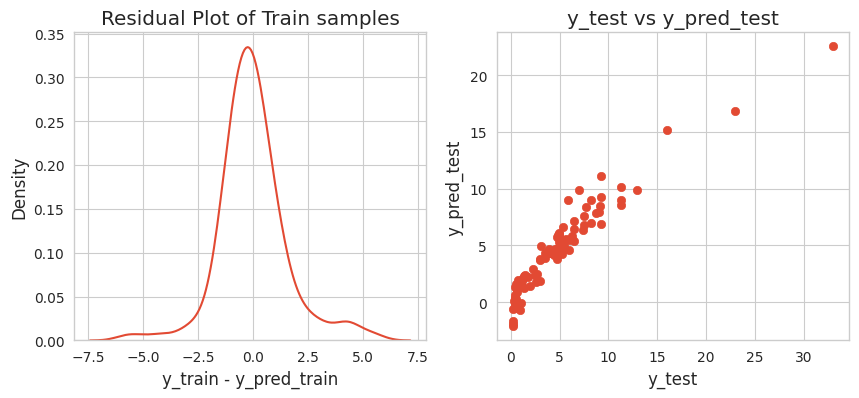

In [66]:
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

## Ridge

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

Train R2-score : 0.88
Test R2-score : 0.88
Train CV scores : [0.87758818 0.90110365 0.89418453 0.77370947 0.80691691]
Train CV mean : 0.85


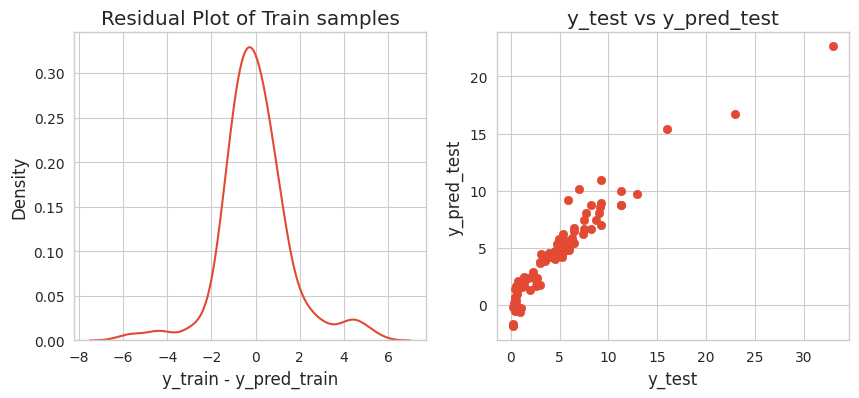

In [68]:
# Create model
rg = Ridge()

# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions=dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

In [69]:
print(rg_rs.best_estimator_)

Ridge(alpha=14.251026703029993)


## Lasso

In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

Train R2-score : 0.88
Test R2-score : 0.88
Train CV scores : [0.87595106 0.90047983 0.8936895  0.76956694 0.80687374]
Train CV mean : 0.85


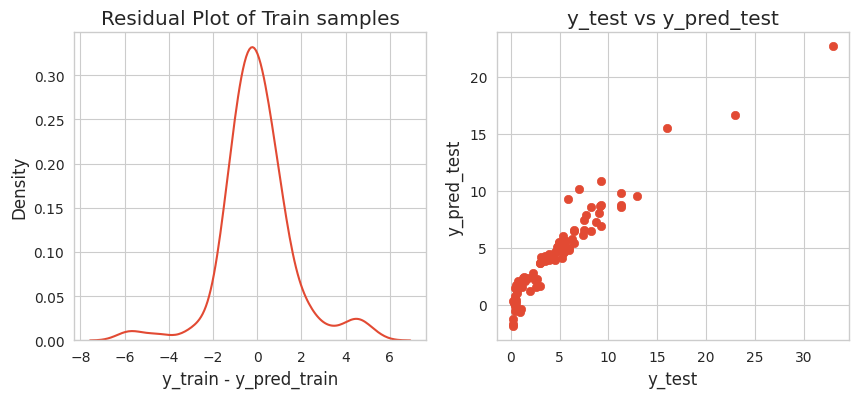

In [71]:
# Define model
ls = Lasso()

# Range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
ls_rs = RandomizedSearchCV(estimator=ls,param_distributions=dict(alpha=alpha))

car_pred_model(ls_rs,"lasso.pkl")

In [72]:
print(ls_rs.best_estimator_)

Lasso(alpha=0.07017038286703829)


## Random Forest

In [73]:
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [74]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

Train R2-score : 0.99
Test R2-score : 0.9
Train CV scores : [0.97016537 0.95033231 0.94739154 0.89522761 0.95285529]
Train CV mean : 0.94


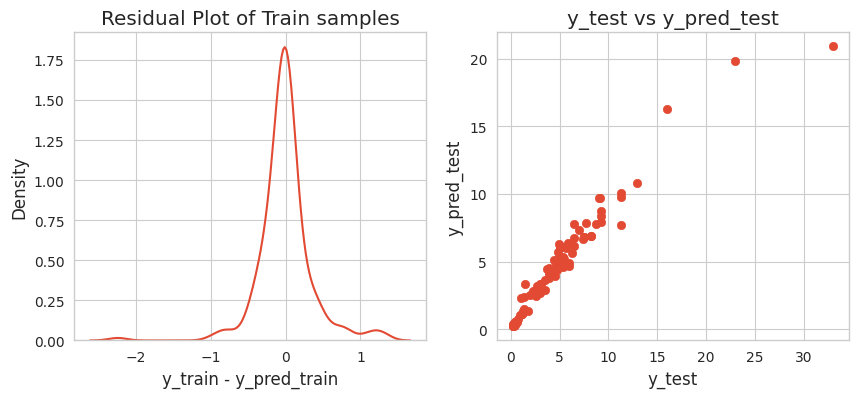

In [75]:
car_pred_model(model,"RandomForest.pkl")

<Axes: >

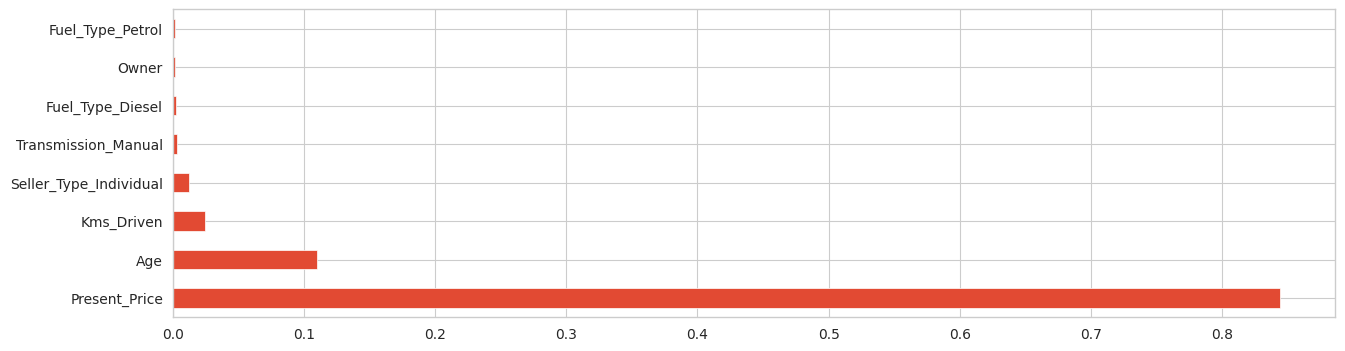

In [76]:
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(15,4))

## Random Forest CV

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Train R2-score : 0.96
Test R2-score : 0.86
Train CV scores : [0.97523025 0.93519086 0.9293207  0.87611363 0.93207469]
Train CV mean : 0.93


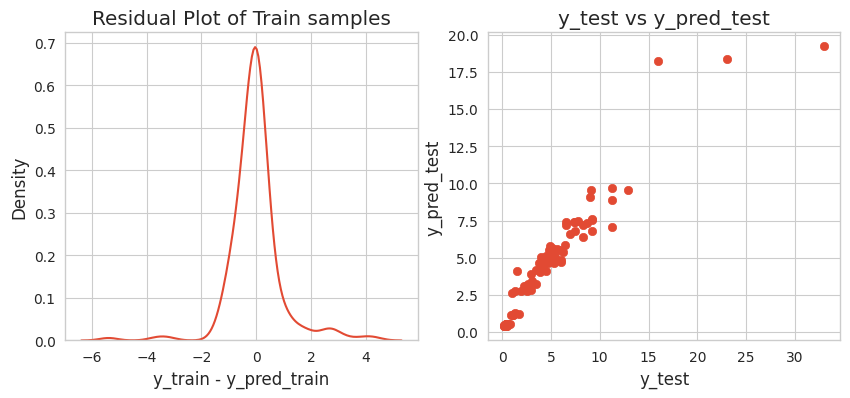

In [78]:
# Define model
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators = list(range(500,1000,100))

# Maximum number of levels in a tree
max_depth = list(range(4,9,4))

# Minimum number of samples required to split an internal node
min_samples_split = list(range(4,9,2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1,2,5,7]

# Number of fearures to be considered at each split
max_features = ['auto','sqrt']

# Hyperparameters dict
param_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'max_features':max_features}

rf_rs = RandomizedSearchCV(estimator=rf,param_distributions=param_grid)

car_pred_model(rf_rs,'random_forest.pkl')

In [79]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='auto', min_samples_split=8,
                      n_estimators=800)


## Gradient Boosting

In [80]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

Train R2-score : 1.0
Test R2-score : 0.93
Train CV scores : [0.96598701 0.94256334 0.93414563 0.90459222 0.95111166]
Train CV mean : 0.94


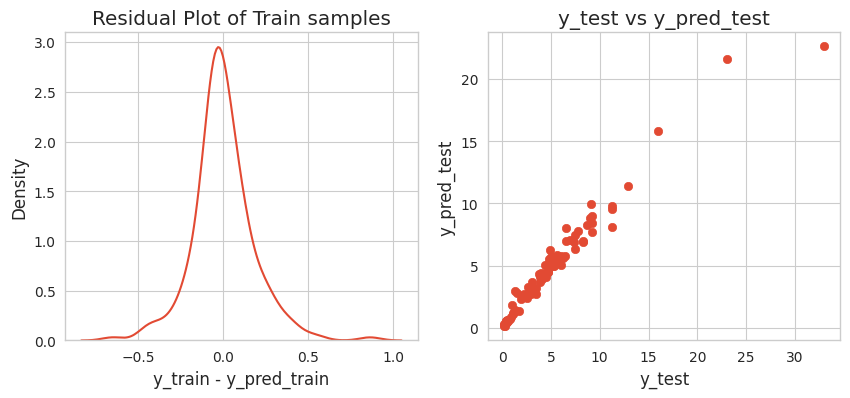

In [81]:
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]

# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))

# Maximum number of levels in a tree
max_depth=list(range(4,9,4))

# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]

# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator=gb,param_distributions=param_grid)

car_pred_model(gb_rs,"gradient_boosting.pkl")

In [82]:
print(gb_rs.best_estimator_)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='auto',
                          min_samples_leaf=2, min_samples_split=6,
                          n_estimators=900)


# **Comparacion**

In [83]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForest","RandomForestRegressorCV","GradientBoostingRegressor"]

In [84]:
R2_train

[0.88, 0.88, 0.88, 0.99, 0.96, 1.0]

In [85]:
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,
                      'R Squared(Test)': R2_test,'CV score mean(Train)': CV})

In [86]:
R2_train

[0.88, 0.88, 0.88, 0.99, 0.96, 1.0]

In [87]:
results

Model  R Squared(Train)  R Squared(Test)  \
0           LinearRegression              0.88             0.88   
1                      Ridge              0.88             0.88   
2                      Lasso              0.88             0.88   
3               RandomForest              0.99             0.90   
4    RandomForestRegressorCV              0.96             0.86   
5  GradientBoostingRegressor              1.00             0.93   

   CV score mean(Train)  
0                  0.84  
1                  0.85  
2                  0.85  
3                  0.94  
4                  0.93  
5                  0.94

# V. Modelado II

## Scale data

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
y_test_actual = y_test

In [90]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [93]:
# Intercepto
pd.DataFrame(data=np.append(lr.intercept_,lr.coef_),
             index=['Intercept']+[col+'Coef.' for col in X.columns],columns=['Value']).sort_values('Value',ascending=False)

Value
Intercept                    4.336570
Present_PriceCoef.           3.683557
Fuel_Type_DieselCoef.        0.806576
Fuel_Type_PetrolCoef.        0.207959
Transmission_ManualCoef.    -0.085335
OwnerCoef.                  -0.240508
Seller_Type_IndividualCoef. -0.392281
Kms_DrivenCoef.             -0.564721
AgeCoef.                    -0.871912

### Evaluation

In [94]:
from sklearn import metrics

In [95]:
def model_evaluation(model,X_test,y_test,model_name):
  y_pred = model.predict(X_test)

  MAE = metrics.mean_absolute_error(y_test,y_pred)
  MSE = metrics.mean_squared_error(y_test,y_pred)
  RMSE = np.sqrt(MSE)
  R2_Score = metrics.r2_score(y_test,y_pred)

  return pd.DataFrame([MAE,MSE,RMSE,R2_Score],index=['MAE','MSE','RMSE','R2-Score'],columns=[model_name])

In [96]:
model_evaluation(lr,X_test_scaled,y_test,'Linear Reg.')

Linear Reg.
MAE          1.014296
MSE          2.828876
RMSE         1.681926
R2-Score     0.880799

# VI. Cross-Validation

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Al utilizar la validación cruzada, podemos tener más confianza en nuestra estimación de las métricas de evaluación del modelo que la antigua división simple de prueba de tren:

In [98]:
lr_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),LinearRegression())

kf = KFold(n_splits=6,shuffle=True,random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline,X,y,cv=kf,return_train_score=True,scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean':[MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean],'Std':[MAE_std,MSE_std,RMSE_std,R2_Score_std]},index=['MAE','MSE','RMSE','R2-Score'])

Mean       Std
MAE       1.129362  0.199263
MSE       3.045037  1.105924
RMSE      1.715227  0.320987
R2-Score  0.841662  0.040340

El modelo de regresión lineal obtuvo una puntuación R2 de %84 utilizando una validación cruzada de 6 cruces.

Pipeline es una excelente manera de evitar la fuga de datos, ya que garantiza que se realice el método adecuado en el subconjunto de datos correcto. Esto es ideal para usar en la validación cruzada, ya que garantiza que solo se usen los pliegues de entrenamiento al realizar el ajuste y que el conjunto de prueba (conjunto de validación) se use solo para calcular la puntuación de precisión en cada iteración de la validación cruzada.

## Suposición

Necesitamos verificar los supuestos de la regresión lineal, porque si no se cumplen los supuestos, la interpretación de los resultados no siempre será válida:

#### **Supuesto 1: Linealidad**

Esto supone que existe una relación lineal entre las variables o características independientes y la variable o etiqueta dependiente. Ajustar un modelo lineal a datos con patrones no lineales da como resultado graves errores de predicción, porque nuestro modelo está insuficientemente ajustado.

Para detectar la no linealidad, podemos comprobar:

+ Gráficas de valores reales versus valores predichos -> El resultado deseado es que los puntos se distribuyan simétricamente alrededor de una línea diagonal
+ Gráficas de residuos versus valores predichos -> El resultado deseado es que los puntos se distribuyan simétricamente alrededor de una línea horizontal

En ambos casos deberíamos tener una varianza casi constante.

In [99]:
# Get residuals
def residuals(model, X_test, y_test):
    '''
    Crea predicciones sobre las características con el modelo y calcula residuos.
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [100]:
# Plot Predicted vs Real vs Residuals
def linear_assumption(model, X_test, y_test):
    '''
    Función para inspeccionar visualmente el supuesto de linealidad en un modelo de regresión lineal
    '''
    df_results = residuals(model, X_test, y_test)

    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Valores Predecidos', fontsize=15)
    ax[0].set_xlabel('Prediccion', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)

    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuos vs. Valores Predecidos', fontsize=15)
    ax[1].set_xlabel('Prediccion', fontsize=12)
    ax[1].set_ylabel('Residuos', fontsize=12)

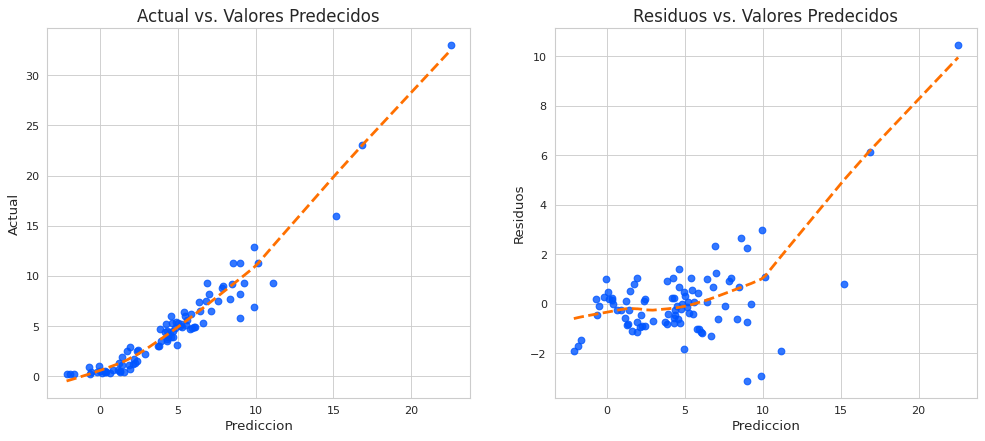

In [101]:
linear_assumption(lr, X_test_scaled, y_test)

La inspección de las gráficas muestra que no se cumple el supuesto de linealidad.

Posibles soluciones:

- Aplicar transformaciones no lineales.
- Agregar términos polinomiales a algunos de los predictores.

#### **Supuesto 2 - Normalidad de los residuos**

Esto supone que los términos de error del modelo se distribuyen normalmente con un valor medio de cero.

En realidad, esto puede suceder si los predictores o la etiqueta son significativamente anormales. Otras posibles razones podrían incluir la violación del supuesto de linealidad o la presencia de algunos valores atípicos importantes en los datos que afectan nuestro modelo.

Una violación de este supuesto podría causar problemas al reducir o inflar nuestros intervalos de confianza. Cuando la distribución de residuos se aleja significativamente de la gaussiana, los intervalos de confianza pueden ser demasiado amplios o demasiado estrechos. Técnicamente, podemos omitir este supuesto si, en cambio, asumimos que la ecuación del modelo es correcta y nuestro objetivo es estimar los coeficientes y generar predicciones (en el sentido de minimizar el error cuadrático medio). Sin embargo, normalmente estamos interesados en hacer inferencias válidas a partir del modelo o estimar la probabilidad de que un error de predicción determinado supere algún umbral en una dirección particular. Para ello, se debe satisfacer el supuesto sobre la normalidad de los residuos.

Para investigar este supuesto podemos comprobar:

- Verificar histograma de residuos
- Gráfico de probabilidad cuantil-cuantil -> trazar los residuos frente al orden de la estadística
- Prueba de Anderson-Darling

In [102]:
from statsmodels.stats.diagnostic import normal_ad
from scipy import stats

In [103]:
def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Función para inspeccionar el supuesto de normalidad de los residuos.
    '''
    df_results = residuals(model, X_test, y_test)

    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]

    print('\nP-value de la prueba (por debajo de 0,05 generalmente significa anormal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Los residuos no se distribuyen normalmente. Supuesto no satisfecho.')
    else:
        print('Los residuos se distribuyen normalmente. Supuesto satisfecho.')


    # Residuals Histogram
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)

    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15,
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribución de residuos', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))


    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Gráfica Q-Q de residuos", fontsize=15)
    ax[1].set_xlabel('Cuantiles teóricos', fontsize=12)
    ax[1].set_ylabel('Valores ordenados', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])

    plt.show()


P-value de la prueba (por debajo de 0,05 generalmente significa anormal):   0.0
Los residuos no se distribuyen normalmente. Supuesto no satisfecho.


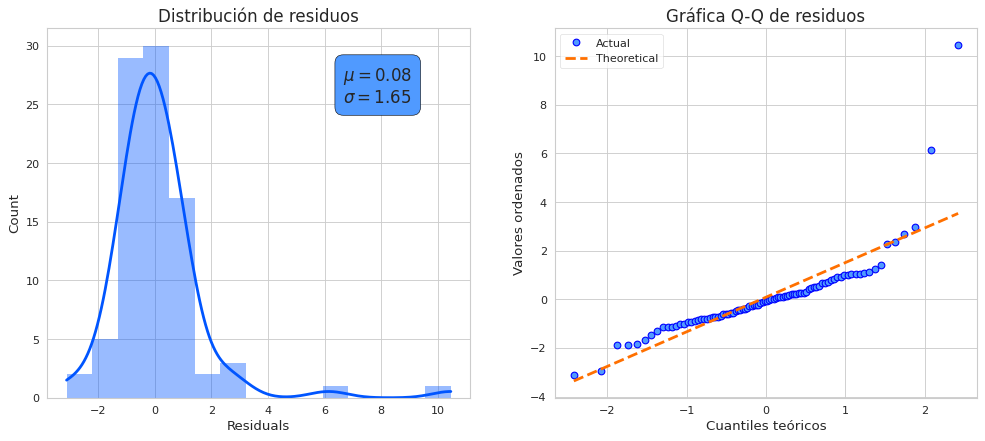

In [104]:
normal_errors_assumption(lr, X_test_scaled, y_test)

En QQ Gráfico de residuos:

- El patrón en forma de arco de desviaciones de la diagonal implica que los residuos tienen una asimetría excesiva.
- El patrón de desviaciones de la diagonal en forma de S implica una curtosis excesiva de los residuos (hay demasiados o muy pocos errores grandes en ambas direcciones).

El valor medio distinto de cero y la asimetría positiva de la distribución residual y el patrón en forma de s de las desviaciones en el gráfico QQ muestran que los residuos no siguen la distribución gaussiana.

Posibles soluciones:

- Transformación no lineal de variables y características de destino.
- Eliminación de posibles valores atípicos

#### **Supuesto 3: No hay multicolinealidad perfecta**

La multicolinealidad ocurre cuando las variables independientes están correlacionadas entre sí. Al modelo le resulta difícil estimar la relación entre cada variable independiente y la variable dependiente de forma independiente porque las variables independientes tienden a cambiar al unísono. Las estimaciones de los coeficientes pueden variar enormemente según qué otras variables independientes estén en el modelo y se vuelven muy sensibles a pequeños cambios en el modelo. Por lo tanto, las estimaciones serán menos precisas y altamente sensibles a conjuntos particulares de datos. Esto aumenta el error estándar de los coeficientes, lo que hace que potencialmente se muestren estadísticamente insignificantes cuando en realidad podrían ser significativos. Por otro lado, los cambios simultáneos de las variables independientes pueden provocar grandes fluctuaciones de la variable objetivo, lo que conduce al sobreajuste del modelo y a la reducción de su rendimiento.

Para detectar multicolinealidad, podemos:

- Utilice un mapa de calor de la correlación (paso 7)
- Examinar el factor de inflación de varianza (VIF)

Interpretación del VIF: la raíz cuadrada del VIF de una variable determinada muestra cuánto mayor es el error estándar, en comparación con lo que sería si ese predictor no estuviera correlacionado con las otras características del modelo. Cuanto mayor sea el valor del VIF mayor correlación habrá entre esta variable y el resto. Una regla general es que si VIF > 10 entonces la multicolinealidad es alta.

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
def multicollinearity_assumption(X):
    ''''
    Esto supone que los predictores no están correlacionados entre sí y calcula los valores VIF de los predictores.
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])

    print('{} casos de posible multicolinealidad.'.format(possible_multicollinearity))
    print('{} casos de multicolinealidad definida.'.format(definite_multicollinearity))

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('==> Supuesto satisfecho.')
        else:
            print('==> Supuesto posiblemente satisfecho.')
    else:
        print('==> Supuesto no satisfecho.')

    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [117]:
multicollinearity_assumption(X)

2 casos de posible multicolinealidad.
0 casos de multicolinealidad definida.
==> Supuesto posiblemente satisfecho.


vif
Present_Price            5.06
Kms_Driven               5.24
Owner                    1.10
Age                     23.74
Fuel_Type_Diesel         7.16
Fuel_Type_Petrol        24.02
Seller_Type_Individual   2.63
Transmission_Manual      9.68

Existe posible multicolinealidad para ***Fuel_Type_Petrol***

Posibles soluciones:

- Usando la regularización
- Eliminación de características con valores altos de VIF
- Uso de PCA -> Reducir funciones a un conjunto más pequeño de componentes no correlacionados

#### **Supuesto 4: No hay autocorrelación de residuos**
Esto supone que no hay autocorrelación de los residuos. La presencia de autocorrelación generalmente indica que nos falta información que el modelo debería capturar. Nuestro modelo puede estar sistemáticamente sesgado por una predicción insuficiente o excesiva en determinadas condiciones. Esto podría ser el resultado de violar el supuesto de linealidad.

Para investigar este supuesto podemos realizar una prueba de Durbin-Watson para determinar si la correlación es positiva o negativa:

- El estadístico de prueba siempre tiene un valor entre 0 y 4
- Valores de 1,5 < d < 2,5 significa que no hay autocorrelación en los datos
- Los valores < 1,5 indican autocorrelación positiva, los valores > 2,5 indican autocorrelación negativa

In [107]:
from statsmodels.stats.stattools import durbin_watson

In [110]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    Se supone que no existe autocorrelación en los residuos. Si hay autocorrelación, entonces
     hay un patrón que no se explica porque el valor actual depende del valor anterior.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))

    if durbinWatson < 1.5:
        print('Signos de autocorrelación positiva. Supuesto no satisfecho.', '\n')
    elif durbinWatson > 2.5:
        print('Signos de autocorrelación negativa. Supuesto no satisfecho.', '\n')
    else:
        print('Poca o ninguna autocorrelación. Supuesto satisfecho.', '\n')

In [111]:
autocorrelation_assumption(lr, X_test_scaled, y_test)

Durbin-Watson: 1.826
Poca o ninguna autocorrelación. Supuesto satisfecho. 



#### **Supuesto 5 - Homoscedasticidad**

La homocedasticidad significa que los residuos no cambian en todos los valores de la variable objetivo.

Cuando los residuos no tienen una varianza constante, es difícil determinar la verdadera desviación estándar de los errores de pronóstico, lo que generalmente resulta en intervalos de confianza demasiado amplios o estrechos. El efecto de la heterocedasticidad también podría ser darle demasiada importancia a un subconjunto de datos al estimar los coeficientes.

Para investigar si los residuos son homocedásticos, podemos observar una gráfica de residuos versus valores predichos. La ubicación de los puntos debe ser aleatoria y no debe ser visible ningún patrón (aumento/disminución en los valores de los residuos).

In [126]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    La homocedasticidad supone que los residuos exhiben una varianza constante.
    """
    print('La línea naranja debe ser plana:')
    df_results = residuals(model, X_test, y_test)

    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuos vs. Valores Predichos', fontsize=15)
    plt.xlabel('Valores Predichos', fontsize=12)
    plt.ylabel('Residuos', fontsize=12)
    plt.show()

La línea naranja debe ser plana:


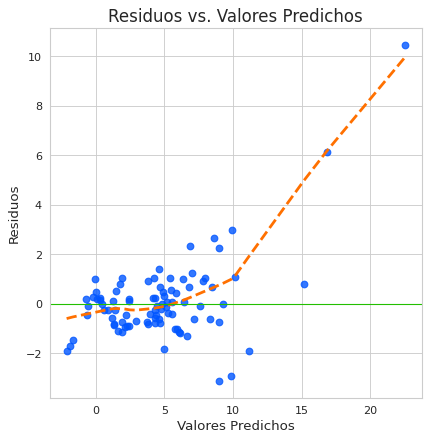

In [127]:
homoscedasticity_assumption(lr, X_test_scaled, y_test)

No podemos ver una varianza completamente uniforme en nuestros residuos porque la línea naranja no es plana. El supuesto no se cumple.

Posibles soluciones:

- Eliminación de valores atípicos
- Aplicar transformación logarítmica de variables independientes.
- Aplicar regresión polinómica

## Acciones
En el siguiente:
- Para satisfacer el supuesto de multicolinealidad, eliminamos la característica Fuel_Type_Petrol.
- Luego, de acuerdo con el patrón en el gráfico de residuos versus valores predichos, usaremos la transformación de Box-cox en todo el conjunto de datos.
- Aplicando la regresión polinómica intentaremos mejorar la satisfacción de la homocedasticidad y la normalidad de los residuos.
- Finalmente, usaremos la regularización para reducir la probabilidad de que el modelo esté sobreajustado.

### Multicolinealidad

In [129]:
del df['Fuel_Type_Petrol']

In [132]:
y_test_pred = lr.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

In [133]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Prediccion vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

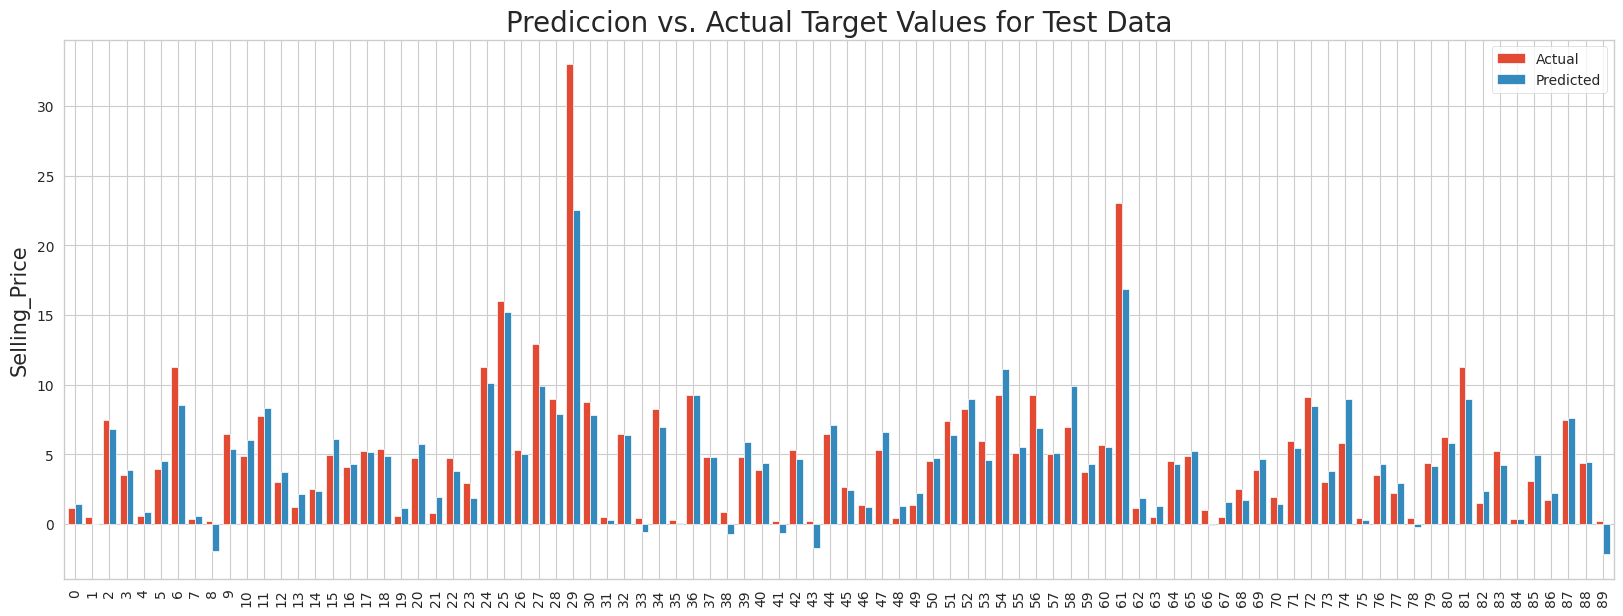

In [134]:
compare_plot(df_comp)

La diferencia entre las barras correspondientes en el gráfico de barras anterior muestra el error de predicción del modelo en los datos de prueba. Además, de 90 muestras de prueba, Precio_Venta se predijo negativamente en 6 casos. Una predicción negativa para Precio_Venta es decepcionante.

### Transformación Box-Cox

**Aplicar transformación Box-Cox**

Para satisfacer los supuestos de regresión, aplicamos la transformación de Box-Cox a todo el conjunto de datos. Las transformaciones de Box-Cox cambian la forma de nuestros datos, acercándolos más a una distribución normal.

Para evitar la fuga de datos, el valor lambda ajustado para cada característica se obtiene del conjunto de datos de entrenamiento y luego se aplica la transformación a los datos de entrenamiento y de prueba:

In [135]:
# Transformamos los datos de entrenamiento y guardamos los valores Lambda
fitted_lambda = pd.Series(np.zeros(len(df.columns), dtype=np.float64), index=df.columns)

y_train, fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1)
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)

fitted_lambda

Selling_Price             -0.098987
Present_Price              0.022479
Kms_Driven                 0.344000
Owner                    -37.329734
Age                       -1.273013
Fuel_Type_Diesel          -8.122252
Seller_Type_Individual    -2.211276
Transmission_Manual       10.644786
Fuel_Type_Petrol           7.665474
dtype: float64

In [136]:
# Transformamos los datos de prueba utilizando valores Lambda
y_test = stats.boxcox(y_test+1, fitted_lambda['Selling_Price'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [137]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['Selling_Price'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['Selling_Price'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

del df_boxcox['Fuel_Type_Petrol']

La distribución de variables continuas tenía mucha asimetría positiva. A continuación podemos ver el cambio en la forma de la distribución de estas variables después de aplicar la transformación de Box-Cox:

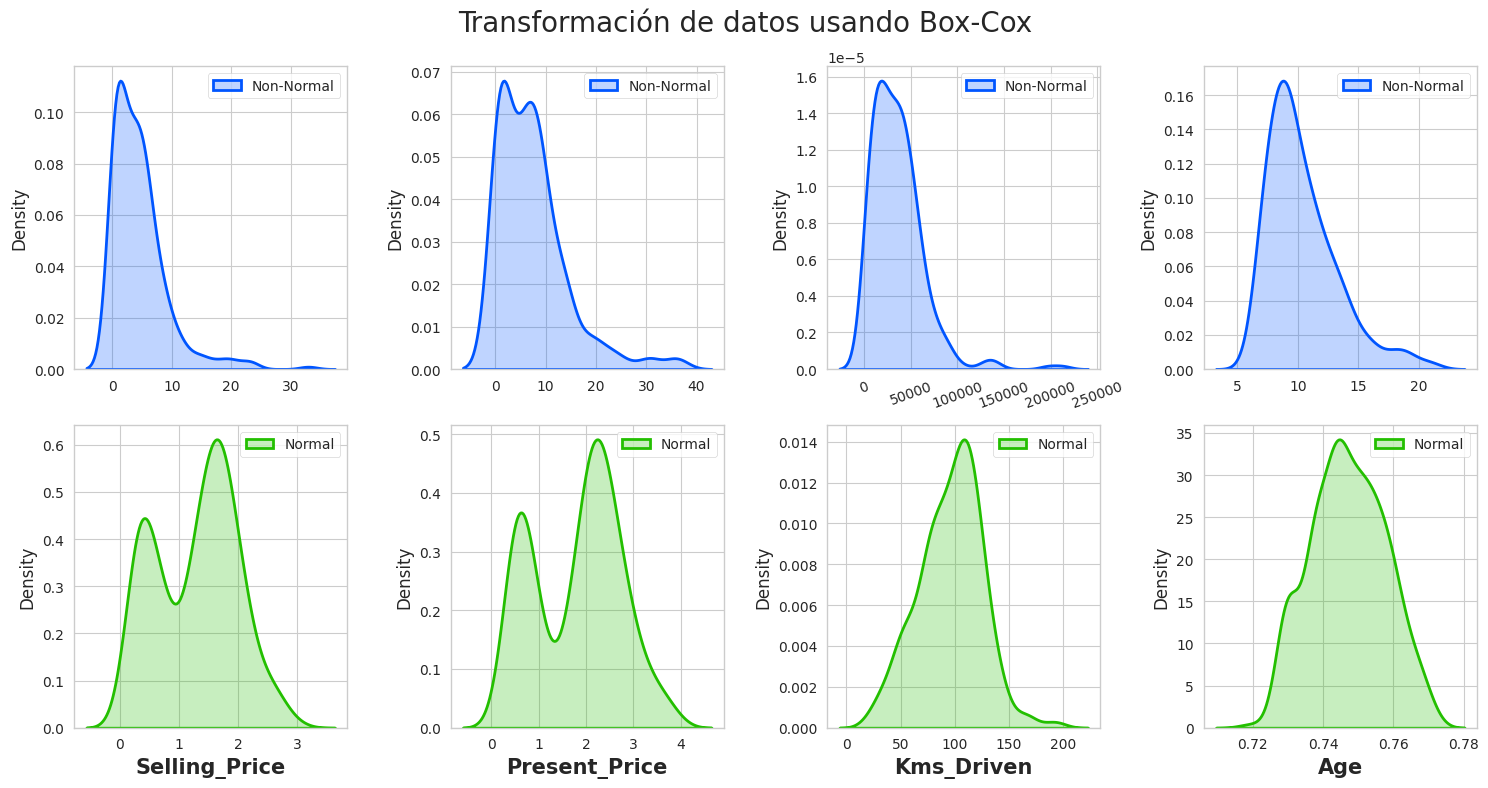

In [138]:
fig, ax = plt.subplots(2, 4, figsize=(15,8), dpi=100)
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i,col in enumerate(columns):
    sns.kdeplot(df[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Transformación de datos usando Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

La distribución de las variables se acerca más a la distribución normal después de aplicar Box-Cox.

In [139]:
X = df_boxcox.drop('Selling_Price', axis=1)
y = df_boxcox['Selling_Price']

Ahora se aplica la transformación Box-cox en X e y. A continuación, agregaremos características de orden superior al modelo.

### Regresión polinómica de segundo orden

Para superar el ajuste insuficiente y cumplir con los supuestos de regresión lineal, primero intentamos aumentar la complejidad del modelo agregando todos los términos de segundo orden de las características:

In [140]:
from sklearn.preprocessing import PolynomialFeatures

In [141]:
# Create 2nd-order Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

Present_Price  Kms_Driven  Owner       Age  Fuel_Type_Diesel  \
0       1.926084   94.330863    0.0  0.748431          0.000000   
1       2.418636  111.211825    0.0  0.752322          0.122677   
2       2.449210   57.910239    0.0  0.729881          0.000000   
3       1.669564   52.272136    0.0  0.758240          0.000000   
4       2.111644  110.707593    0.0  0.748431          0.122677   

   Seller_Type_Individual  Transmission_Manual  Present_Price^2  \
0                     0.0            150.31129         3.709799   
1                     0.0            150.31129         5.849802   
2                     0.0            150.31129         5.998629   
3                     0.0            150.31129         2.787443   
4                     0.0            150.31129         4.459040   

   Present_Price Kms_Driven  Present_Price Owner  Present_Price Age  \
0                181.689152                  0.0           1.441540   
1                268.980963                  0.0           1.819592   
2                141.834330                  0.0           1.787631   
3                 87.271661                  0.0           1.265930   
4                233.775005                  0.0           1.580419   

   Present_Price Fuel_Type_Diesel  Present_Price Seller_Type_Individual  \
0                        0.000000                                   0.0   
1                        0.296710                                   0.0   
2                        0.000000                                   0.0   
3                        0.000000                                   0.0   
4                        0.259049                                   0.0   

   Present_Price Transmission_Manual  Kms_Driven^2  Kms_Driven Owner  \
0                         289.512148   8898.311778               0.0   
1                         363.548352  12368.069964               0.0   
2                         368.143895   3353.595825               0.0   
3                         250.954276   2732.376170               0.0   
4                         317.403909  12256.171065               0.0   

   Kms_Driven Age  Kms_Driven Fuel_Type_Diesel  \
0       70.600117                     0.000000   
1       83.667051                    13.643100   
2       42.267576                     0.000000   
3       39.634831                     0.000000   
4       82.856965                    13.581242   

   Kms_Driven Seller_Type_Individual  Kms_Driven Transmission_Manual  Owner^2  \
0                                0.0                    14178.993779      0.0   
1                                0.0                    16716.392870      0.0   
2                                0.0                     8704.562801      0.0   
3                                0.0                     7857.092160      0.0   
4                                0.0                    16640.601089      0.0   

   Owner Age  Owner Fuel_Type_Diesel  Owner Seller_Type_Individual  \
0        0.0                     0.0                           0.0   
1        0.0                     0.0                           0.0   
2        0.0                     0.0                           0.0   
3        0.0                     0.0                           0.0   
4        0.0                     0.0                           0.0   

   Owner Transmission_Manual     Age^2  Age Fuel_Type_Diesel  \
0                        0.0  0.560149              0.000000   
1                        0.0  0.565988              0.092292   
2                        0.0  0.532726              0.000000   
3                        0.0  0.574928              0.000000   
4                        0.0  0.560149              0.091815   

   Age Seller_Type_Individual  Age Transmission_Manual  Fuel_Type_Diesel^2  \
0                         0.0               112.497589             0.00000   
1                         0.0               113.082421             0.01505   
2                         0.0               109.709335    

In [142]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

Con la construcción de funciones de segundo orden, la cantidad de funciones del marco de datos aumentó a 35

In [143]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [144]:
print('X_poly_train shape: ', X_poly_train.shape)
print('X_poly_test shape: ', X_poly_test.shape)
print('y_poly_train shape: ', y_poly_train.shape)
print('y_poly_test shape: ',y_poly_test.shape)

X_poly_train shape:  (207, 35)
X_poly_test shape:  (90, 35)
y_poly_train shape:  (207,)
y_poly_test shape:  (90,)


In [145]:
# Escalar datos usando Standard Scaler
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

In [146]:
# Crear un modelo de regresión polinómica usando regresión lineal
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

In [147]:
# Evaluación del modelo
# Rendimiento del modelo polinómico de segundo orden en datos de prueba
model_evaluation(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg. Test')

Polynomial Reg. Test
MAE                   0.071299
MSE                   0.008825
RMSE                  0.093940
R2-Score              0.979783

In [148]:
# Rendimiento del modelo polinómico de segundo orden en datos de entrenamiento
model_evaluation(polynomial_reg, X_poly_train, y_poly_train, 'Polynomial Reg. Train')

Polynomial Reg. Train
MAE                    0.059680
MSE                    0.005699
RMSE                   0.075491
R2-Score               0.988164

Como puede verse, el uso de la transformación Box-Cox y la producción de características de segundo orden ha mejorado enormemente el rendimiento del modelo.

* MAE: 1,199 ==> 0,088
* MSE: 3,715 ==> 0,011
* RMSE: 1,927 ==> 0,107
* R2-Score: 88,72% ==> 98,16%

La precisión del modelo en los datos de entrenamiento y prueba es cercana entre sí, por lo que el modelo no está sobreajustado.

También se probó la producción de características de tercer orden y superiores, lo que provocó que el modelo se sobreajustara.

#### Validación cruzada
Al utilizar la validación cruzada, podemos tener más confianza en nuestra estimación de las métricas de evaluación del modelo:

In [149]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()

MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()

RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()

R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

Mean           Std
MAE       4.135182e+09  9.246549e+09
MSE       5.027322e+21  1.124143e+22
RMSE      2.894628e+10  6.472584e+10
R2-Score -9.413731e+21  2.104974e+22

La precisión obtenida a partir de la división de la prueba del tren simple es válida porque se acerca a la precisión obtenida mediante la validación cruzada.

Hasta ahora, tenemos un modelo polinomial que consta de 35 características con una puntuación r2 del 98,16%. Comprobemos los supuestos de regresión para este modelo.

#### **Supuesto 1: Linealidad**

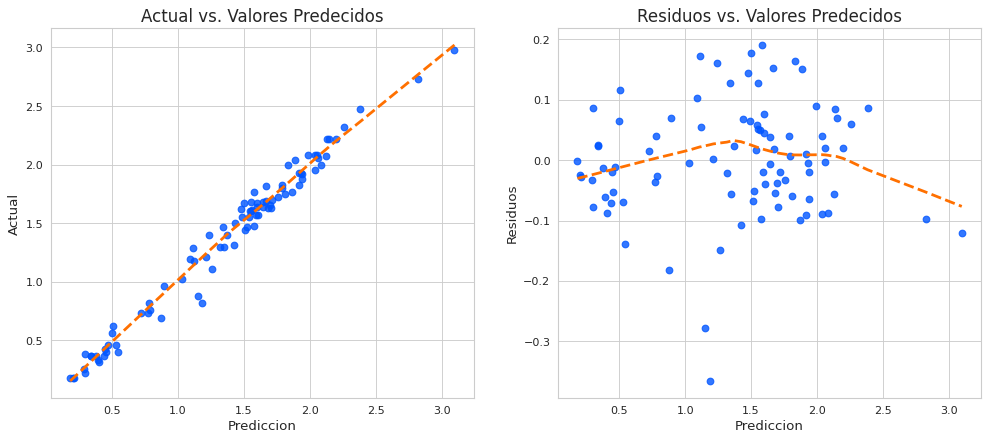

In [150]:
linear_assumption(polynomial_reg, X_poly_test, y_poly_test)

#### **Supuesto 2 - Normalidad de los residuos**


P-value de la prueba (por debajo de 0,05 generalmente significa anormal):   0.203249
Los residuos se distribuyen normalmente. Supuesto satisfecho.


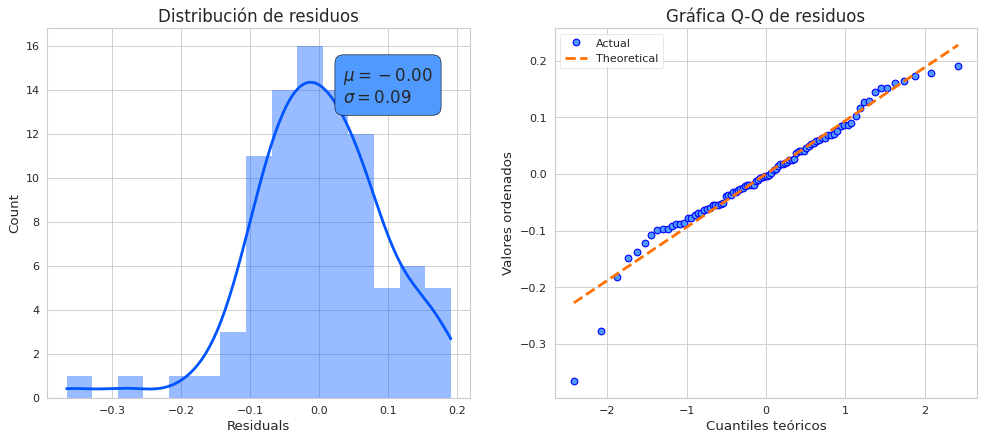

In [151]:
normal_errors_assumption(polynomial_reg, X_poly_test, y_poly_test)

#### **Supuesto 3: No hay multicolinealidad perfecta**

In [152]:
import warnings

In [153]:
warnings.simplefilter(action='ignore')
multicollinearity_assumption(X_poly).T

33 casos de posible multicolinealidad.
28 casos de multicolinealidad definida.
==> Supuesto no satisfecho.


Present_Price  Kms_Driven  Owner        Age  Fuel_Type_Diesel  \
vif      331655.45   151909.06    inf  501223.64               inf   

     Seller_Type_Individual  Transmission_Manual  Present_Price^2  \
vif                     inf                  inf            835.2   

     Present_Price Kms_Driven  Present_Price Owner  Present_Price Age  \
vif                   1400.73                53.62          354281.19   

     Present_Price Fuel_Type_Diesel  Present_Price Seller_Type_Individual  \
vif                          133.69                                 58.51   

     Present_Price Transmission_Manual  Kms_Driven^2  Kms_Driven Owner  \
vif                             401.78        312.66              86.5   

     Kms_Driven Age  Kms_Driven Fuel_Type_Diesel  \
vif       164883.13                       127.09   

     Kms_Driven Seller_Type_Individual  Kms_Driven Transmission_Manual  \
vif                              203.4                           269.7   

     Owner^2  Owner Age  Owner Fuel_Type_Diesel  Owner Seller_Type_Individual  \
vif      inf   61089.19                    2.96                         21.72   

     Owner Transmission_Manual      Age^2  Age Fuel_Type_Diesel  \
vif                     186.08  534533.13              32725.11   

     Age Seller_Type_Individual  Age Transmission_Manual  Fuel_Type_Diesel^2  \
vif                    81689.95                 81059.88                 inf   

     Fuel_Type_Diesel Seller_Type_Individual  \
vif                                     5.94   

     Fuel_Type_Diesel Transmission_Manual  Seller_Type_Individual^2  \
vif                                 41.08                       inf   

     Seller_Type_Individual Transmission_Manual  Transmission_Manual^2  
vif                                      211.03                    inf

#### **Supuesto 4: No hay autocorrelación de residuos**

In [154]:
autocorrelation_assumption(polynomial_reg, X_poly_test, y_poly_test)

Durbin-Watson: 2.212
Poca o ninguna autocorrelación. Supuesto satisfecho. 



#### **Supuesto 5 - Homoscedasticidad**

La línea naranja debe ser plana:


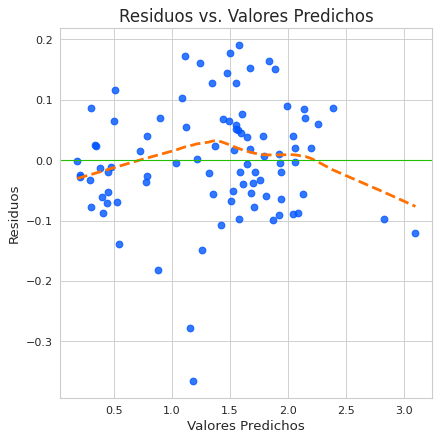

In [155]:
homoscedasticity_assumption(polynomial_reg, X_poly_test, y_poly_test)

Todos los supuestos de regresión se cumplen en buena medida, excepto la multicolinealidad. Pero, en general, el modelo polinomial funciona mejor que el modelo lineal en este conjunto de datos.

## Acciones 2
Para reducir los efectos de multicolinealidad podemos utilizar la regularización. La regresión regularizada impone restricciones a la magnitud de los coeficientes y los reducirá progresivamente hacia cero en relación con las estimaciones de mínimos cuadrados. Hay dos tipos de regularización de la siguiente manera:

* Regularización L1 o Regularización Lasso
* Regularización L2 o Regularización Ridge

### Regresión Ridge

En la regularización L2 o la regularización de Ridge, agregamos una penalización que es la suma de los valores al cuadrado de los pesos en la función de pérdida para llevar los coeficientes estimados hacia cero y no tomar valores más extremos:

Función de pérdida = MCO + alfa * (la suma del cuadrado de los coeficientes)
En la función de pérdida anterior, alfa es el factor de sintonización que tiene control sobre la fuerza del término de penalización. Un valor alfa pequeño hace que el modelo se sobreajuste y un valor alfa grande hace que el modelo se ajuste insuficientemente. Usamos Regresión Ridge con validación cruzada para ajustar el valor alfa:

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [157]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

In [159]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 3, scoring = 'neg_mean_squared_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3, scoring='neg_mean_squared_error')

El valor alfa que da como resultado el MSE de validación cruzada más pequeño

In [160]:
ridge_cv_model.alpha_

0.015269277544167062

In [161]:
# Rendimiento del modelo Ridge en datos de prueba
model_evaluation(ridge_cv_model, X_test, y_test, 'Ridge Reg. Test')

Ridge Reg. Test
MAE              0.081737
MSE              0.015426
RMSE             0.124200
R2-Score         0.964661

In [162]:
# Rendimiento del modelo Ridge en datos de entrenamiento
model_evaluation(ridge_cv_model, X_train, y_train, 'Ridge Reg. Train')

Ridge Reg. Train
MAE               0.066373
MSE               0.006930
RMSE              0.083245
R2-Score          0.985608

- La precisión del modelo en los datos de entrenamiento y de prueba es cercana entre sí, por lo que el modelo no está sobreajustado.
- El modelo Ridge tiene casi la misma precisión que el modelo polinómico.

In [163]:
# Los coeficientes de regresión de Ridge son:
ridge_cv_model.coef_

array([ 1.69253674e+00,  1.14530721e+00, -7.32754213e-02,  8.35626380e-01,
        1.68247928e-02, -6.49266165e-01,  4.84802711e-02, -8.89262646e-02,
       -2.76716222e-01,  8.51720215e-02, -9.54642138e-01,  2.42524977e-01,
        1.63486361e-02,  1.46584285e-01, -3.89117816e-02, -1.36785267e-02,
       -1.09637981e+00,  1.44300095e-01, -4.53338439e-02,  3.04449344e-02,
       -7.32754213e-02,  1.00776546e-02,  1.46783602e-04,  4.44878313e-02,
        5.58301779e-02, -8.97180860e-01, -3.26202580e-01,  1.07703195e+00,
       -2.76939137e-01,  1.68247928e-02,  0.00000000e+00, -4.17621249e-03,
       -6.49266165e-01,  1.90646497e-01,  4.84802711e-02])

La regularización L2 permite que los pesos disminuyan hacia cero pero no al cero exactamente.

#### **Supuesto 1: Linealidad**

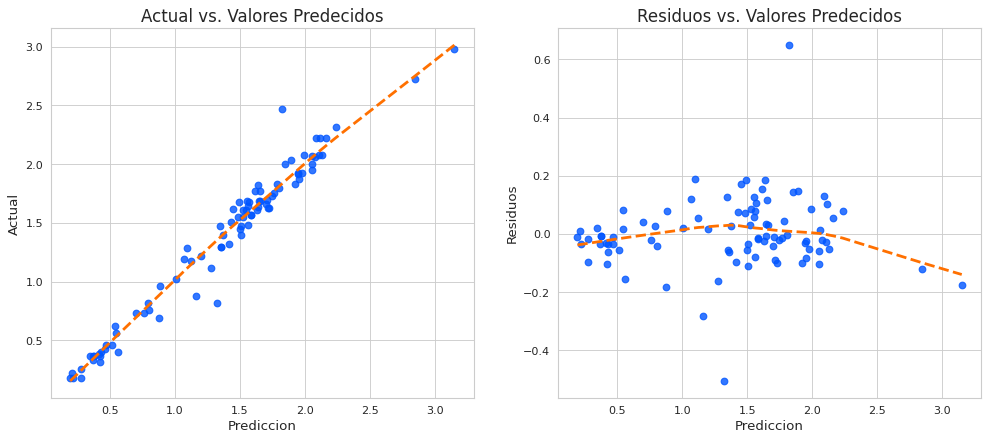

In [165]:
linear_assumption(ridge_cv_model, X_test, y_test)

#### **Supuesto 2 - Normalidad de los residuos**


P-value de la prueba (por debajo de 0,05 generalmente significa anormal):   1.2e-05
Los residuos no se distribuyen normalmente. Supuesto no satisfecho.


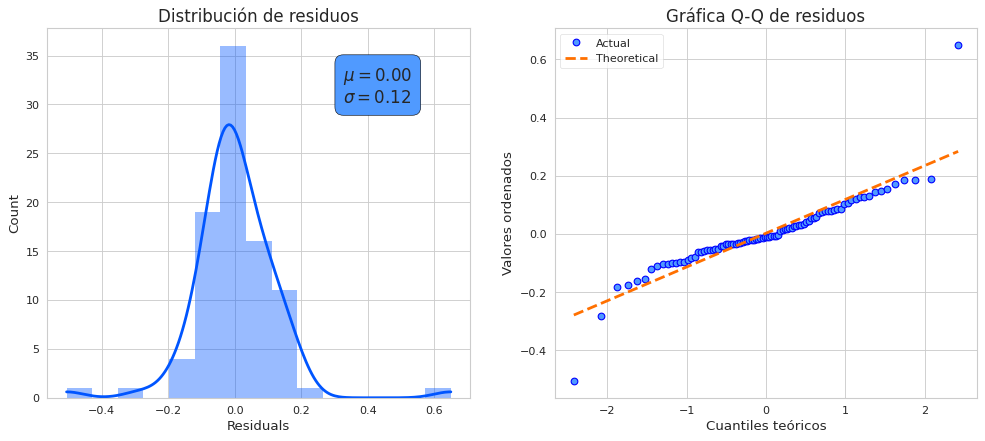

In [166]:
normal_errors_assumption(ridge_cv_model, X_test, y_test)

#### **Supuesto 3: No hay multicolinealidad perfecta**

In [167]:
multicollinearity_assumption(X_poly).T

33 casos de posible multicolinealidad.
28 casos de multicolinealidad definida.
==> Supuesto no satisfecho.


Present_Price  Kms_Driven  Owner        Age  Fuel_Type_Diesel  \
vif      331655.45   151909.06    inf  501223.64               inf   

     Seller_Type_Individual  Transmission_Manual  Present_Price^2  \
vif                     inf                  inf            835.2   

     Present_Price Kms_Driven  Present_Price Owner  Present_Price Age  \
vif                   1400.73                53.62          354281.19   

     Present_Price Fuel_Type_Diesel  Present_Price Seller_Type_Individual  \
vif                          133.69                                 58.51   

     Present_Price Transmission_Manual  Kms_Driven^2  Kms_Driven Owner  \
vif                             401.78        312.66              86.5   

     Kms_Driven Age  Kms_Driven Fuel_Type_Diesel  \
vif       164883.13                       127.09   

     Kms_Driven Seller_Type_Individual  Kms_Driven Transmission_Manual  \
vif                              203.4                           269.7   

     Owner^2  Owner Age  Owner Fuel_Type_Diesel  Owner Seller_Type_Individual  \
vif      inf   61089.19                    2.96                         21.72   

     Owner Transmission_Manual      Age^2  Age Fuel_Type_Diesel  \
vif                     186.08  534533.13              32725.11   

     Age Seller_Type_Individual  Age Transmission_Manual  Fuel_Type_Diesel^2  \
vif                    81689.95                 81059.88                 inf   

     Fuel_Type_Diesel Seller_Type_Individual  \
vif                                     5.94   

     Fuel_Type_Diesel Transmission_Manual  Seller_Type_Individual^2  \
vif                                 41.08                       inf   

     Seller_Type_Individual Transmission_Manual  Transmission_Manual^2  
vif                                      211.03                    inf

#### **Supuesto 4: No hay autocorrelación de residuos**

In [168]:
autocorrelation_assumption(ridge_cv_model, X_test, y_test)

Durbin-Watson: 2.087
Poca o ninguna autocorrelación. Supuesto satisfecho. 



#### **Supuesto 5 - Homoscedasticidad**

La línea naranja debe ser plana:


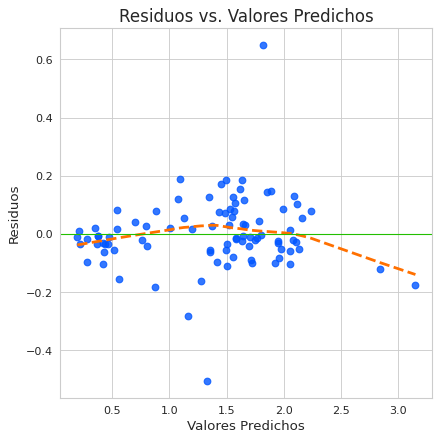

In [169]:
homoscedasticity_assumption(ridge_cv_model, X_test, y_test)

Los supuestos han mejorado ligeramente en comparación con el modelo polinómico.

### Regresión de lazo
En la Regularización L1 o Regularización Lasso, agregamos una penalización que es la suma de los valores absolutos de los pesos en la función de pérdida para llevar los coeficientes estimados hacia cero:

Función de pérdida = MCO + alfa * (la suma del absoluto de los coeficientes)
Nuevamente utilizamos la regresión de lazo con validación cruzada para ajustar el valor alfa:

In [170]:
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)

In [171]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=3, eps=0.01, max_iter=10000)

El valor alfa que da como resultado el error de validación cruzada más pequeño

In [172]:
lasso_cv_model.alpha_

0.006548845033247732

In [173]:
# Rendimiento del modelo Lasso en datos de prueba
model_evaluation(lasso_cv_model, X_test, y_test, 'Lasso Reg. Test')

Lasso Reg. Test
MAE              0.093886
MSE              0.016013
RMSE             0.126541
R2-Score         0.963316

In [174]:
# Rendimiento del modelo Lasso en datos de entrenamiento
model_evaluation(lasso_cv_model, X_train, y_train, 'Lasso Reg. Train')

Lasso Reg. Train
MAE               0.092434
MSE               0.013639
RMSE              0.116786
R2-Score          0.971674

+ La precisión del modelo en los datos de entrenamiento y prueba es cercana entre sí, por lo que el modelo no está sobreajustado.
+ La precisión del modelo Lasso ha disminuido ligeramente en comparación con el modelo Ridge.

In [175]:
# Los coeficientes de regresión de Lasso
lasso_coef = lasso_cv_model.coef_
lasso_coef

array([ 0.5753692 , -0.        , -0.        , -0.        ,  0.        ,
       -0.09825872,  0.        ,  0.        , -0.04162205, -0.00866417,
        0.        ,  0.06274919, -0.        ,  0.        , -0.0352755 ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.00277147,  0.00085344,
       -0.12752622,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.01869611,  0.        ,  0.        ])

In [176]:
# Coeficientes distintos de cero en el modelo Lasso
lasso_coef = pd.DataFrame(lasso_cv_model.coef_, index=X_poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef.T

Present_Price  Seller_Type_Individual  Present_Price Kms_Driven  \
Lasso Coef.       0.575369               -0.098259                 -0.041622   

             Present_Price Owner  Present_Price Fuel_Type_Diesel  \
Lasso Coef.            -0.008664                        0.062749   

             Kms_Driven^2  Owner Seller_Type_Individual  \
Lasso Coef.     -0.035275                     -0.002771   

             Owner Transmission_Manual     Age^2  Seller_Type_Individual^2  
Lasso Coef.                   0.000853 -0.127526                 -0.018696

+ La regularización L1 permite que los pesos disminuyan a cero.
+ A cambio de reducir el número de funciones de 35 a 15, la puntuación R2 del modelo ha disminuido de %98,16 a %96,61.

#### **Supuesto 1: Linealidad**

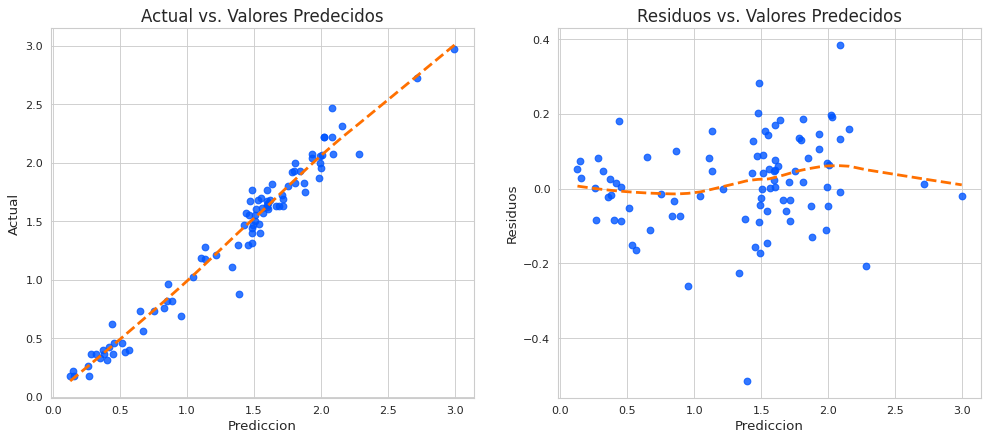

In [177]:
linear_assumption(lasso_cv_model, X_test, y_test)

#### **Supuesto 2 - Normalidad de los residuos**


P-value de la prueba (por debajo de 0,05 generalmente significa anormal):   0.163955
Los residuos se distribuyen normalmente. Supuesto satisfecho.


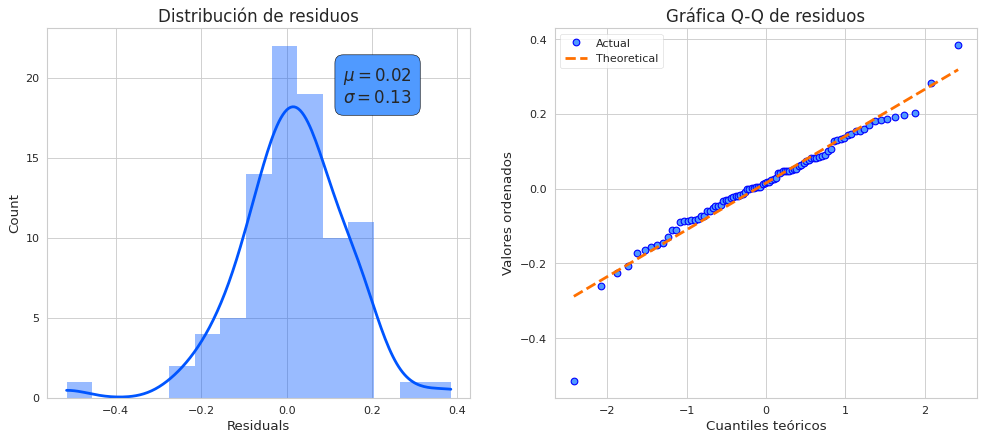

In [178]:
normal_errors_assumption(lasso_cv_model, X_test, y_test)

#### **Supuesto 3: No hay multicolinealidad perfecta**

In [179]:
multicollinearity_assumption(X_poly[lasso_coef.index]).T

6 casos de posible multicolinealidad.
2 casos de multicolinealidad definida.
==> Supuesto no satisfecho.


Present_Price  Seller_Type_Individual  Present_Price Kms_Driven  \
vif           93.2                     inf                     76.95   

     Present_Price Owner  Present_Price Fuel_Type_Diesel  Kms_Driven^2  \
vif                 2.16                            1.85         23.15   

     Owner Seller_Type_Individual  Owner Transmission_Manual  Age^2  \
vif                           2.3                       3.46  50.72   

     Seller_Type_Individual^2  
vif                       inf

#### **Supuesto 4: No hay autocorrelación de residuos**

In [180]:
autocorrelation_assumption(lasso_cv_model, X_test, y_test)

Durbin-Watson: 1.998
Poca o ninguna autocorrelación. Supuesto satisfecho. 



#### **Supuesto 5 - Homoscedasticidad**

La línea naranja debe ser plana:


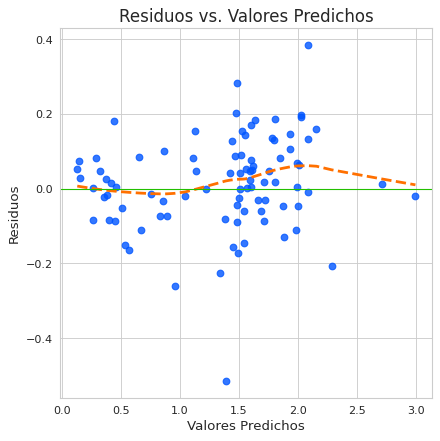

In [181]:
homoscedasticity_assumption(lasso_cv_model, X_test, y_test)

El supuesto de colinealidad se cumple mejor en el lazo que en la Regresion Ridge, pero las condiciones en otros supuestos son ligeramente peores que las de Ridge.

### Regresión Elastic-Net

Elastic-Net permite un equilibrio de las penalizaciones L1 y L2, lo que puede dar como resultado un mejor rendimiento que un modelo con una u otra penalización por problemas.

Función de pérdida = MCO + [alpha l1_ratio L1-norm] + [0.5 alpha (1 - l1_ratio) * L2-norm]
Además de establecer un valor alfa, Elastic-Net también nos permite ajustar el parámetro l1-ratio donde l1-ratio = 0 corresponde a cresta y l1-ratio = 1 corresponde a lazo. Nuevamente utilizamos la regresión Elastic-Net con validación cruzada para ajustar los hiperparámetros:

In [182]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1],
                                eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [183]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(cv=3, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 0.998, 1],
             max_iter=100000)

El valor de la relación L1 que da como resultado el error de validación cruzada más pequeño es:

In [184]:
elastic_cv_model.l1_ratio_

1.0

El valor alfa que da como resultado el error de validación cruzada más pequeño es:

In [185]:
elastic_cv_model.alpha_

0.0006548845033247732

In [186]:
# Rendimiento del modelo Elastic-Net en datos de prueba:
model_evaluation(elastic_cv_model, X_test, y_test, 'Elastic-Net Reg. Test')

Elastic-Net Reg. Test
MAE                    0.086225
MSE                    0.013954
RMSE                   0.118129
R2-Score               0.968031

In [187]:
# Rendimiento del modelo Elastic-Net en datos de entrenamiento:
model_evaluation(elastic_cv_model, X_train, y_train, 'Elastic-Net Reg. Train')

Elastic-Net Reg. Train
MAE                     0.076785
MSE                     0.009712
RMSE                    0.098551
R2-Score                0.979829

- La precisión del modelo en los datos de entrenamiento y de prueba es cercana entre sí, por lo que el modelo no está sobreajustado.
- La precisión del modelo Elastic-Net ha disminuido ligeramente en comparación con el modelo Ridge.

In [188]:
# Los coeficientes de regresión de ElasticNet son:
elastic_coef = elastic_cv_model.coef_
elastic_coef

array([ 0.73154945,  0.10859356, -0.        , -0.        , -0.        ,
       -0.00394876, -0.        , -0.01636655, -0.26831471, -0.00123706,
        0.        ,  0.06354821,  0.01748529,  0.05776625, -0.07375652,
       -0.        ,  0.        ,  0.0635634 ,  0.        ,  0.00256698,
       -0.        , -0.        , -0.00625037, -0.00876518,  0.00496633,
       -0.11796079, -0.01146841, -0.        , -0.06561309, -0.        ,
        0.        , -0.03704978, -0.17071617,  0.07657345, -0.        ])

In [189]:
# Coeficientes distintos de cero en el modelo Elastic-Net:
elastic_coef = pd.DataFrame(elastic_cv_model.coef_, index=X_poly.columns, columns=['ElasticNet Coef.'])
elastic_coef = elastic_coef[elastic_coef['ElasticNet Coef.']!=0]
elastic_coef.T

Present_Price  Kms_Driven  Seller_Type_Individual  \
ElasticNet Coef.       0.731549    0.108594               -0.003949   

                  Present_Price^2  Present_Price Kms_Driven  \
ElasticNet Coef.        -0.016367                 -0.268315   

                  Present_Price Owner  Present_Price Fuel_Type_Diesel  \
ElasticNet Coef.            -0.001237                        0.063548   

                  Present_Price Seller_Type_Individual  \
ElasticNet Coef.                              0.017485   

                  Present_Price Transmission_Manual  Kms_Driven^2  \
ElasticNet Coef.                           0.057766     -0.073757   

                  Kms_Driven Fuel_Type_Diesel  Kms_Driven Transmission_Manual  \
ElasticNet Coef.                     0.063563                        0.002567   

                  Owner Fuel_Type_Diesel  Owner Seller_Type_Individual  \
ElasticNet Coef.                -0.00625                     -0.008765   

                  Owner Transmission_Manual     Age^2  Age Fuel_Type_Diesel  \
ElasticNet Coef.                   0.004966 -0.117961             -0.011468   

                  Age Transmission_Manual  \
ElasticNet Coef.                -0.065613   

                  Fuel_Type_Diesel Transmission_Manual  \
ElasticNet Coef.                              -0.03705   

                  Seller_Type_Individual^2  \
ElasticNet Coef.                 -0.170716   

                  Seller_Type_Individual Transmission_Manual  
ElasticNet Coef.                                    0.076573

ElasticNet contiene 20 coeficientes distintos de cero.

#### **Supuesto 1: Linealidad**

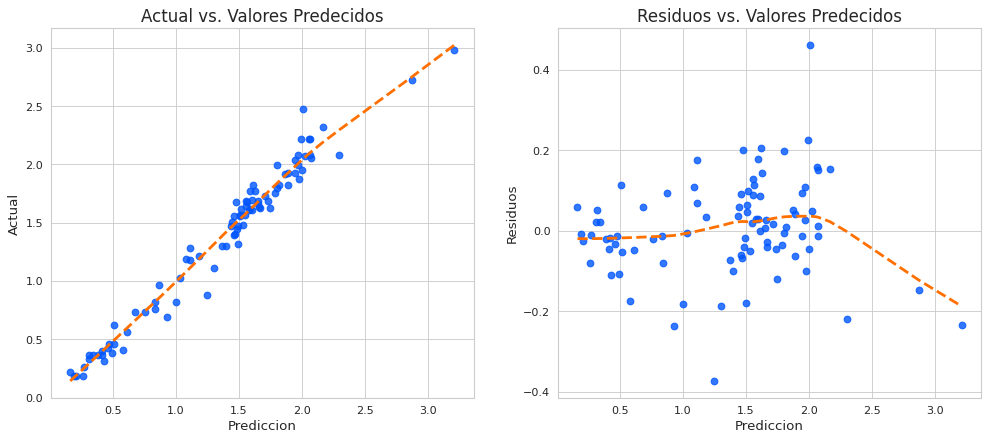

In [190]:
linear_assumption(elastic_cv_model, X_test, y_test)

#### **Supuesto 2 - Normalidad de los residuos**


P-value de la prueba (por debajo de 0,05 generalmente significa anormal):   0.053604
Los residuos se distribuyen normalmente. Supuesto satisfecho.


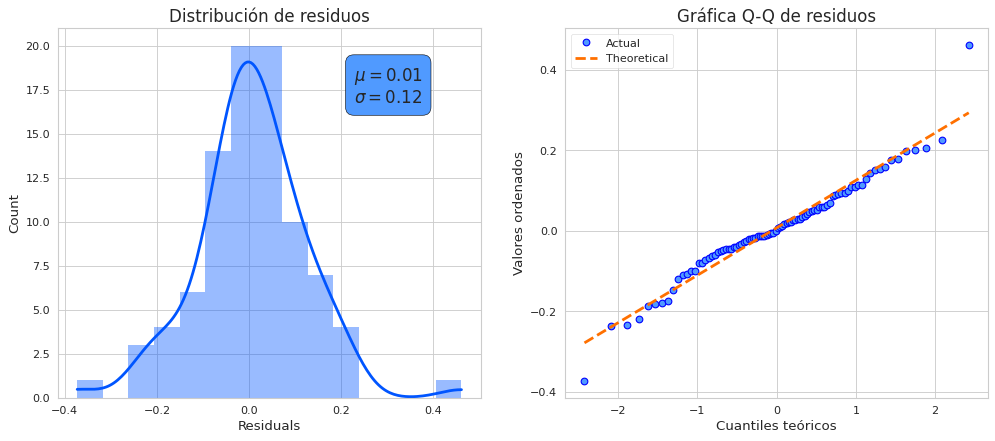

In [191]:
normal_errors_assumption(elastic_cv_model, X_test, y_test)

#### **Supuesto 3: No hay multicolinealidad perfecta**

In [192]:
multicollinearity_assumption(X_poly[elastic_coef.index]).T

17 casos de posible multicolinealidad.
14 casos de multicolinealidad definida.
==> Supuesto no satisfecho.


Present_Price  Kms_Driven  Seller_Type_Individual  Present_Price^2  \
vif        2276.67      443.65                     inf            480.4   

     Present_Price Kms_Driven  Present_Price Owner  \
vif                    120.54                 3.74   

     Present_Price Fuel_Type_Diesel  Present_Price Seller_Type_Individual  \
vif                          128.39                                 27.63   

     Present_Price Transmission_Manual  Kms_Driven^2  \
vif                             267.11        105.22   

     Kms_Driven Fuel_Type_Diesel  Kms_Driven Transmission_Manual  \
vif                        43.64                           131.3   

     Owner Fuel_Type_Diesel  Owner Seller_Type_Individual  \
vif                    1.43                          3.21   

     Owner Transmission_Manual    Age^2  Age Fuel_Type_Diesel  \
vif                       5.66  1503.68                263.92   

     Age Transmission_Manual  Fuel_Type_Diesel Transmission_Manual  \
vif                   448.02                                 34.29   

     Seller_Type_Individual^2  Seller_Type_Individual Transmission_Manual  
vif                       inf                                      113.26

#### **Supuesto 4: No hay autocorrelación de residuos**

In [193]:
autocorrelation_assumption(elastic_cv_model, X_test, y_test)

Durbin-Watson: 2.068
Poca o ninguna autocorrelación. Supuesto satisfecho. 



#### **Supuesto 5 - Homoscedasticidad**

La línea naranja debe ser plana:


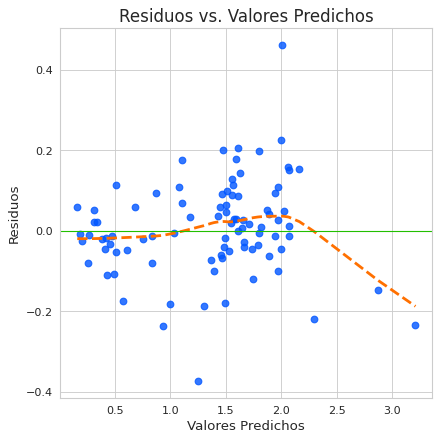

In [194]:
homoscedasticity_assumption(elastic_cv_model, X_test, y_test)

Los supuestos se cumplen en buena medida, pero la precisión del modelo es menor que la del modelo Ridge.

### Modelos polinomiales regularizados de orden superior

La siguiente función produce características de alto orden desde el segundo orden hasta el orden deseado y entrena y evalúa modelos regularizados en el conjunto de características de cada orden y luego devuelve la puntuación r2 y la cantidad de características utilizadas por cada modelo regularizado en el forma de dos marcos de datos separados:

In [195]:
def poly_check(degree, X, y):
    ridge_scores = []
    lasso_scores = []
    elasticnet_scores = []

    ridge_features = []
    lasso_features = []
    elasticnet_features = []

    for d in range(2,degree+1):
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly_features.fit_transform(X)
        X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Ridge
        alphas = 10**np.linspace(10,-2,100)*0.5
        ridge_cv = RidgeCV(alphas = alphas, cv=3, scoring = 'neg_mean_squared_error')
        ridge_cv.fit(X_train, y_train)
        ridge_scores.append(ridge_cv.score(X_test,y_test))
        ridge_cols = ridge_cv.coef_[ridge_cv.coef_!=0].shape[0]
        ridge_features.append(ridge_cols)

        # Lasso
        lasso_cv = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)
        lasso_cv.fit(X_train, y_train)
        lasso_scores.append(lasso_cv.score(X_test,y_test))
        lasso_cols = lasso_cv.coef_[lasso_cv.coef_!=0].shape[0]
        lasso_features.append(lasso_cols)

        # Elastic-Net
        elastic_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=3, max_iter=100000)
        elastic_cv.fit(X_train, y_train)
        elasticnet_scores.append(elastic_cv.score(X_test,y_test))
        elasticnet_cols = elastic_cv.coef_[elastic_cv.coef_!=0].shape[0]
        elasticnet_features.append(elasticnet_cols)

    scores = pd.DataFrame({'Ridge':ridge_scores, 'Lasso':lasso_scores, 'ElasticNet':elasticnet_scores}).round(4)
    scores = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), scores], axis=1)
    feature_num = pd.DataFrame({'Ridge':ridge_features, 'Lasso':lasso_features, 'ElasticNet':elasticnet_features})
    feature_num = pd.concat([pd.DataFrame({'Degree':range(2,degree+1)}), feature_num], axis=1)
    return scores, feature_num

In [196]:
scores, feature_num = poly_check(6, X, y)

El siguiente código visualiza los resultados obtenidos al llamar a la función anterior:

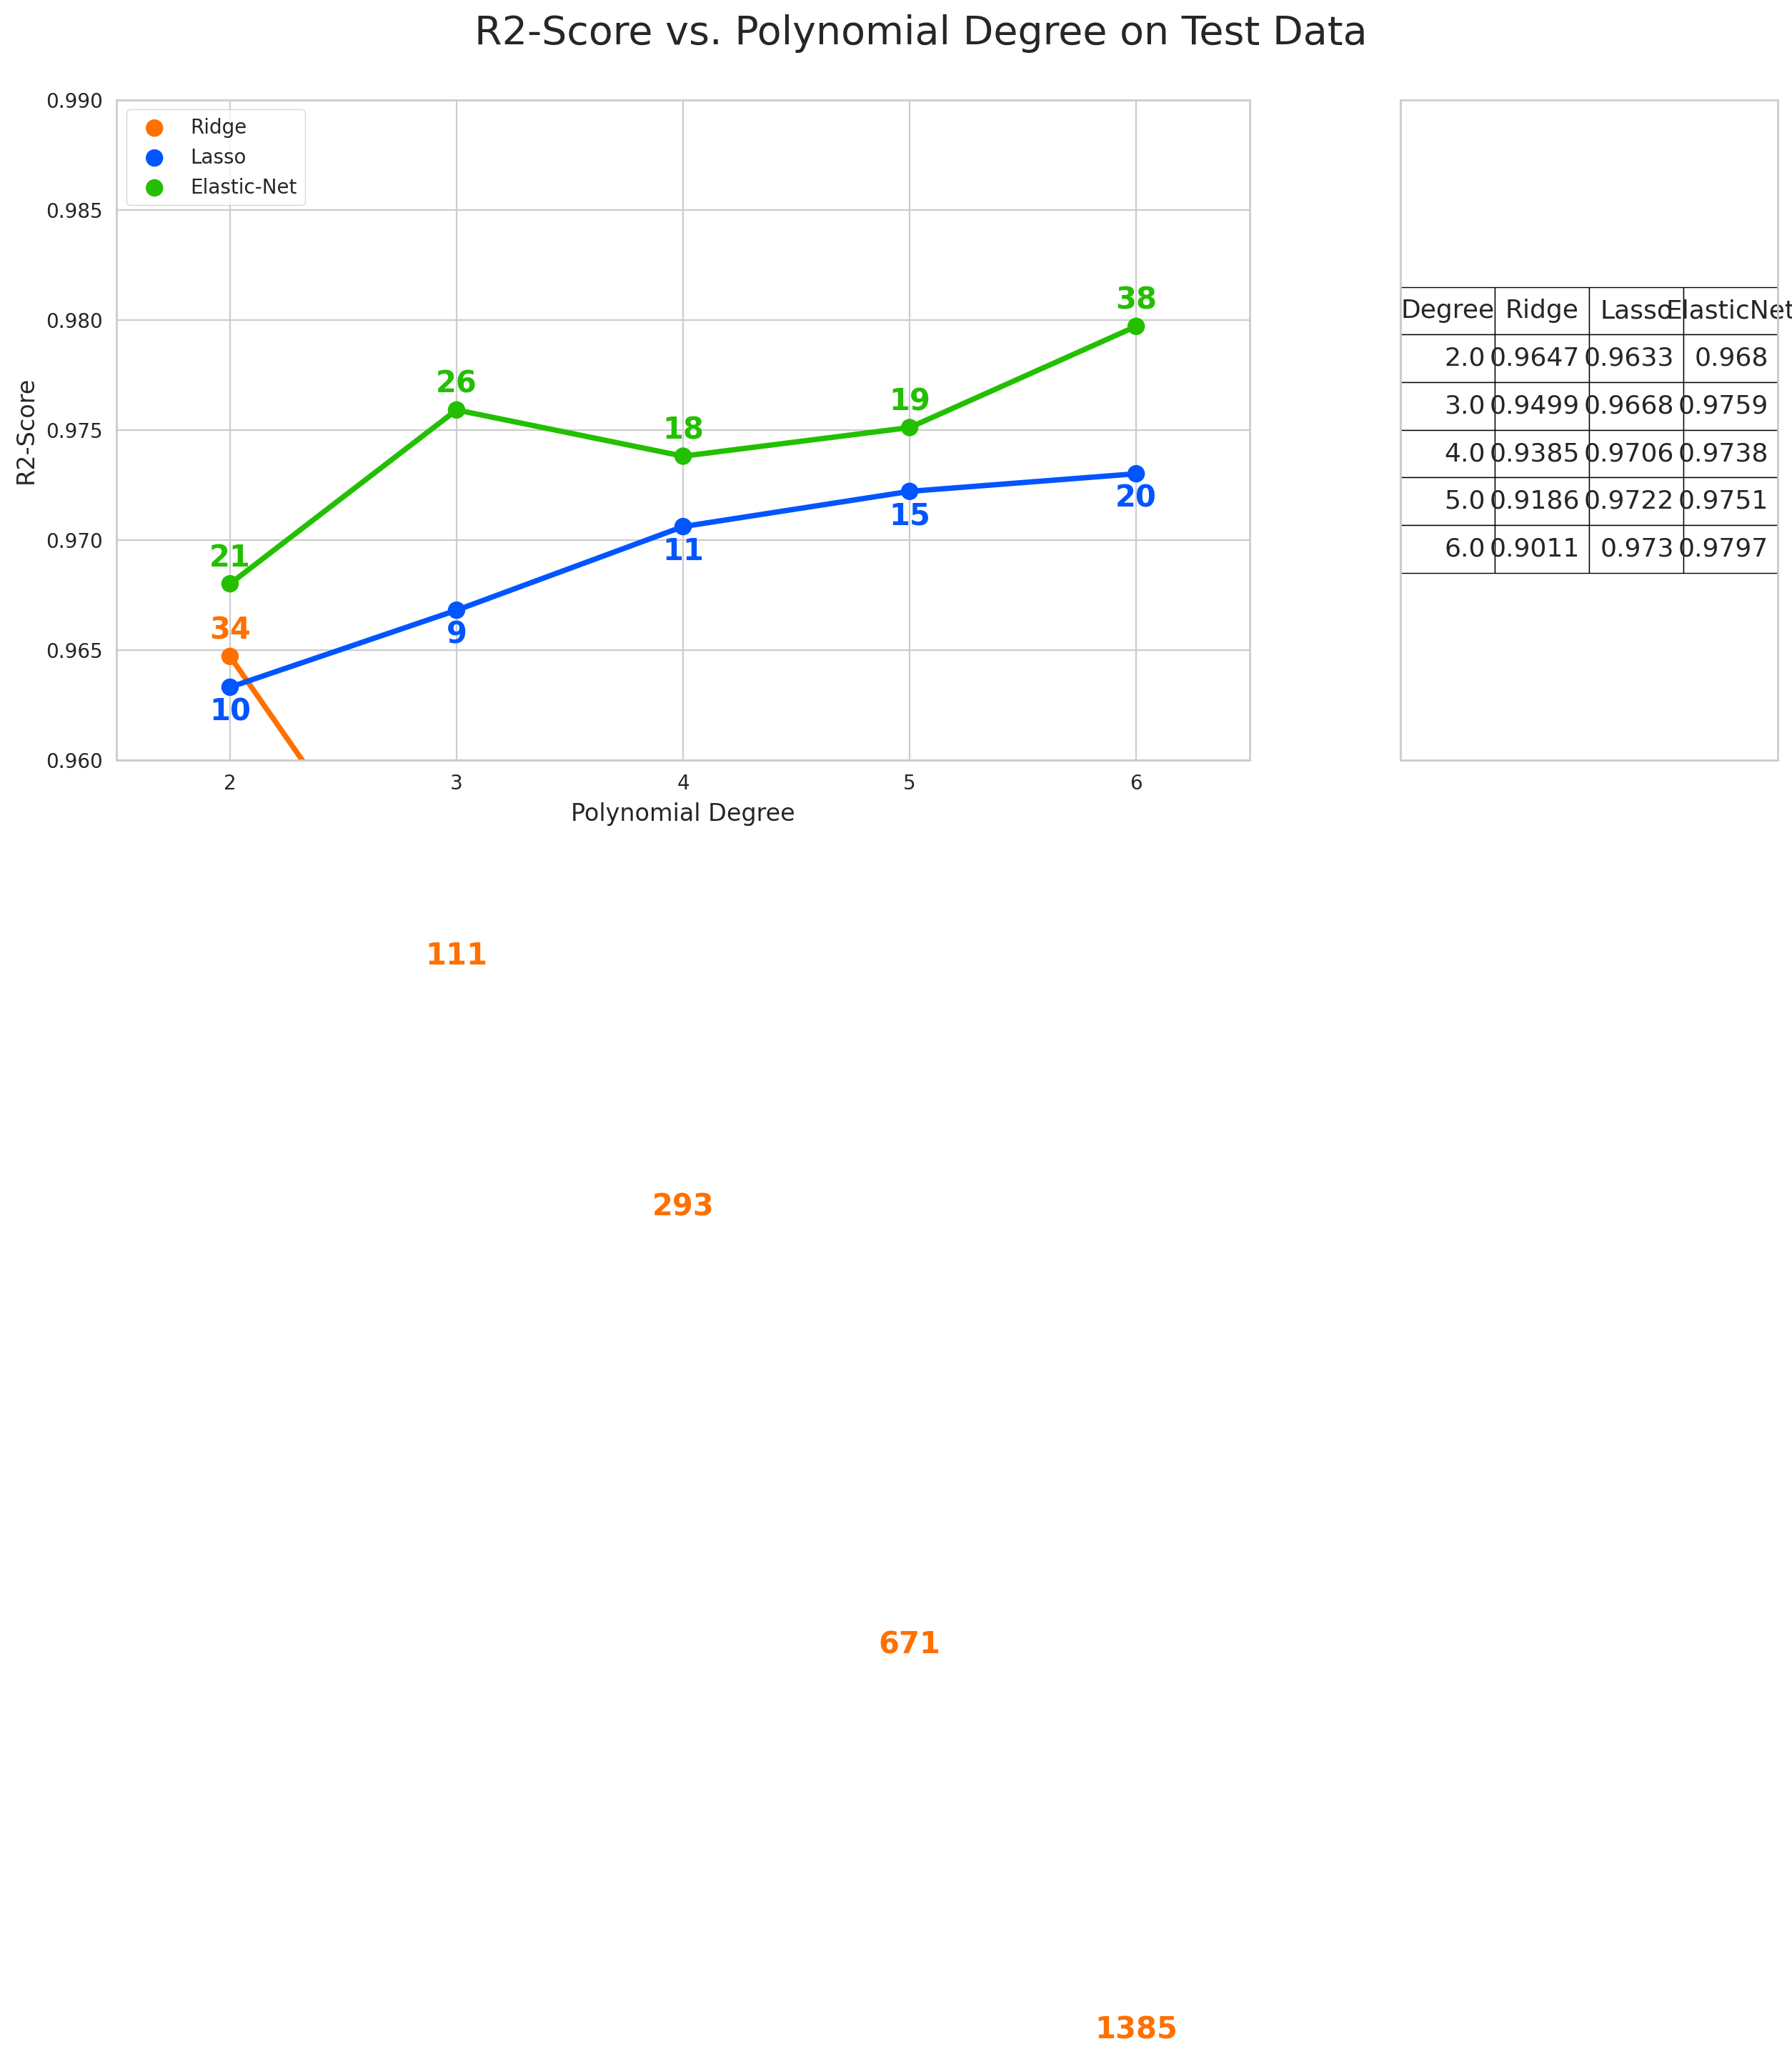

In [197]:
# Plot1
fig, ax = plt.subplots(1, 2, figsize=(15,6), dpi=200, gridspec_kw={'width_ratios': [3, 1]})

sns.pointplot(x=scores['Degree'], y=scores['Ridge'], color='#ff7000', label='Ridge', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['Lasso'], color='#0055ff', label='Lasso', ax=ax[0])
sns.pointplot(x=scores['Degree'], y=scores['ElasticNet'], color='#23bf00', label='Elastic-Net', ax=ax[0])
ax[0].set_xlabel('Polynomial Degree', fontsize=12)
ax[0].set_ylabel('R2-Score', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(axis='x')
ax[0].set_ylim([0.96, 0.99])

# Anotar puntos
for i,j,f in zip(scores['Degree']-2, scores['Ridge'], feature_num['Ridge']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#ff7000', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['Lasso'], feature_num['Lasso']):
    ax[0].text(i, j-0.0015, str(f), ha='center', color='#0055ff', weight='bold', fontsize=15)

for i,j,f in zip(scores['Degree']-2, scores['ElasticNet'], feature_num['ElasticNet']):
    ax[0].text(i, j+0.0008, str(f), ha='center', color='#23bf00', weight='bold', fontsize=15)

# Plot2
table = ax[1].table(cellText=scores.values, colLabels=scores.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)
ax[1].set_xticks([])
ax[1].set_yticks([])
table.scale(1, 2)

plt.suptitle('R2-Score vs. Polynomial Degree on Test Data', fontsize=20)
plt.tight_layout()
plt.show()

- El gráfico de la izquierda muestra la tendencia de los cambios de puntuación r2 relacionados con tres modelos regularizados, incluidos ridge, lasso y elastic-net, junto con el aumento en el orden de las funciones utilizadas.
- Los valores anotados en el gráfico de la izquierda son el número de funciones utilizadas en cada modelo.
- La tabla de la derecha contiene puntuaciones r2 para cada modelo.
Un modelo óptimo es aquel que no sólo utiliza menos funciones, sino que también tiene una puntuación r2 alta.
- En la situación en la que el modelo polinómico simple se sobreajustó para el modelo de orden 3d en el paso 10, pero los modelos regularizados no se sobreajustaron para las características de órdenes superiores a 2.

Con base en el gráfico anterior, elegimos el modelo  Elastic-Net basado en el modelo polinómico de cuarto orden como modelo óptimo. Al aumentar el orden de 4 en adelante, la puntuación r2 del modelo es casi constante:

Create 5th-order Polynomial Features

In [198]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head()

Present_Price  Kms_Driven  Owner       Age  Fuel_Type_Diesel  \
0       1.926084   94.330863    0.0  0.748431          0.000000   
1       2.418636  111.211825    0.0  0.752322          0.122677   
2       2.449210   57.910239    0.0  0.729881          0.000000   
3       1.669564   52.272136    0.0  0.758240          0.000000   
4       2.111644  110.707593    0.0  0.748431          0.122677   

   Seller_Type_Individual  Transmission_Manual  Present_Price^2  \
0                     0.0            150.31129         3.709799   
1                     0.0            150.31129         5.849802   
2                     0.0            150.31129         5.998629   
3                     0.0            150.31129         2.787443   
4                     0.0            150.31129         4.459040   

   Present_Price Kms_Driven  Present_Price Owner  Present_Price Age  \
0                181.689152                  0.0           1.441540   
1                268.980963                  0.0           1.819592   
2                141.834330                  0.0           1.787631   
3                 87.271661                  0.0           1.265930   
4                233.775005                  0.0           1.580419   

   Present_Price Fuel_Type_Diesel  Present_Price Seller_Type_Individual  \
0                        0.000000                                   0.0   
1                        0.296710                                   0.0   
2                        0.000000                                   0.0   
3                        0.000000                                   0.0   
4                        0.259049                                   0.0   

   Present_Price Transmission_Manual  Kms_Driven^2  Kms_Driven Owner  \
0                         289.512148   8898.311778               0.0   
1                         363.548352  12368.069964               0.0   
2                         368.143895   3353.595825               0.0   
3                         250.954276   2732.376170               0.0   
4                         317.403909  12256.171065               0.0   

   Kms_Driven Age  Kms_Driven Fuel_Type_Diesel  \
0       70.600117                     0.000000   
1       83.667051                    13.643100   
2       42.267576                     0.000000   
3       39.634831                     0.000000   
4       82.856965                    13.581242   

   Kms_Driven Seller_Type_Individual  Kms_Driven Transmission_Manual  Owner^2  \
0                                0.0                    14178.993779      0.0   
1                                0.0                    16716.392870      0.0   
2                                0.0                     8704.562801      0.0   
3                                0.0                     7857.092160      0.0   
4                                0.0                    16640.601089      0.0   

   Owner Age  Owner Fuel_Type_Diesel  Owner Seller_Type_Individual  \
0        0.0                     0.0                           0.0   
1        0.0                     0.0                           0.0   
2        0.0                     0.0                           0.0   
3        0.0                     0.0                           0.0   
4        0.0                     0.0                           0.0   

   Owner Transmission_Manual     Age^2  Age Fuel_Type_Diesel  \
0                        0.0  0.560149              0.000000   
1                        0.0  0.565988              0.092292   
2                        0.0  0.532726              0.000000   
3                        0.0  0.574928              0.000000   
4                        0.0  0.560149              0.091815   

   Age Seller_Type_Individual  Age Transmission_Manual  Fuel_Type_Diesel^2  \
0                         0.0               112.497589             0.00000   
1                         0.0               113.082421             0.01505   
2                         0.0               109.709335    

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [200]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [201]:
final_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, cv=4, max_iter=100000)

In [202]:
final_model.fit(X_train, y_train)

ElasticNetCV(cv=4, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=100000)

El valor de la relación L1 que da como resultado el error de validación cruzada más pequeño es:

In [203]:
final_model.l1_ratio_

1.0

El valor alfa que da como resultado el error de validación cruzada más pequeño es:

In [204]:
final_model.alpha_

0.003039704597938317

In [205]:
# Rendimiento del modelo Elastic-Net en datos de prueba:
model_evaluation(final_model, X_test, y_test, 'Final Model. Test')

Final Model. Test
MAE                0.081610
MSE                0.012111
RMSE               0.110052
R2-Score           0.972254

In [206]:
# Rendimiento del modelo Elastic-Net en datos de entrenamiento:
model_evaluation(final_model, X_train, y_train, 'Final Model. Train')

Final Model. Train
MAE                 0.077155
MSE                 0.009562
RMSE                0.097787
R2-Score            0.980140

* La precisión del modelo en los datos de entrenamiento y de prueba es cercana entre sí, por lo que el modelo no está sobreajustado.

In [207]:
# Los coeficientes de regresión son:
final_coef = pd.DataFrame(final_model.coef_, index=X_poly.columns, columns=['Final Model Coef.'])
final_coef = final_coef[final_coef['Final Model Coef.']!=0]
final_coef.T

Present_Price  Seller_Type_Individual  \
Final Model Coef.       0.665115               -0.024596   

                   Present_Price^2 Kms_Driven^2  \
Final Model Coef.                     -0.091953   

                   Present_Price^2 Kms_Driven Fuel_Type_Diesel  \
Final Model Coef.                                      0.05326   

                   Present_Price^2 Owner Fuel_Type_Diesel  \
Final Model Coef.                               -0.001993   

                   Present_Price Kms_Driven^3  \
Final Model Coef.                   -0.065197   

                   Present_Price Kms_Driven^2 Fuel_Type_Diesel  \
Final Model Coef.                                     0.036825   

                   Present_Price Kms_Driven^2 Transmission_Manual  \
Final Model Coef.                                       -0.006131   

                   Present_Price Kms_Driven Owner Fuel_Type_Diesel  \
Final Model Coef.                                        -0.000015   

                   Present_Price Kms_Driven Seller_Type_Individual Transmission_Manual  \
Final Model Coef.                                           0.010587                     

                   Kms_Driven^2 Seller_Type_Individual Transmission_Manual  \
Final Model Coef.                                           0.001848         

                      Age^4  Age^3 Transmission_Manual  \
Final Model Coef. -0.118924                  -0.000868   

                   Seller_Type_Individual^4  
Final Model Coef.                  -0.05928

In [208]:
# Coeficientes distintos de cero en el modelo:
final_coef = pd.DataFrame(final_model.coef_, index=X_poly.columns, columns=['Final Model Coef.'])
final_coef = final_coef[final_coef['Final Model Coef.']!=0]
final_coef.T

Present_Price  Seller_Type_Individual  \
Final Model Coef.       0.665115               -0.024596   

                   Present_Price^2 Kms_Driven^2  \
Final Model Coef.                     -0.091953   

                   Present_Price^2 Kms_Driven Fuel_Type_Diesel  \
Final Model Coef.                                      0.05326   

                   Present_Price^2 Owner Fuel_Type_Diesel  \
Final Model Coef.                               -0.001993   

                   Present_Price Kms_Driven^3  \
Final Model Coef.                   -0.065197   

                   Present_Price Kms_Driven^2 Fuel_Type_Diesel  \
Final Model Coef.                                     0.036825   

                   Present_Price Kms_Driven^2 Transmission_Manual  \
Final Model Coef.                                       -0.006131   

                   Present_Price Kms_Driven Owner Fuel_Type_Diesel  \
Final Model Coef.                                        -0.000015   

                   Present_Price Kms_Driven Seller_Type_Individual Transmission_Manual  \
Final Model Coef.                                           0.010587                     

                   Kms_Driven^2 Seller_Type_Individual Transmission_Manual  \
Final Model Coef.                                           0.001848         

                      Age^4  Age^3 Transmission_Manual  \
Final Model Coef. -0.118924                  -0.000868   

                   Seller_Type_Individual^4  
Final Model Coef.                  -0.05928

Multicolinealidad del modelo final

In [209]:
X_poly_final = X_poly[final_coef.index]
multicollinearity_assumption(X_poly_final).T

11 casos de posible multicolinealidad.
4 casos de multicolinealidad definida.
==> Supuesto no satisfecho.


Present_Price  Seller_Type_Individual  Present_Price^2 Kms_Driven^2  \
vif           65.8                     inf                         88.94   

     Present_Price^2 Kms_Driven Fuel_Type_Diesel  \
vif                                        41.74   

     Present_Price^2 Owner Fuel_Type_Diesel  Present_Price Kms_Driven^3  \
vif                                     inf                       70.88   

     Present_Price Kms_Driven^2 Fuel_Type_Diesel  \
vif                                        39.61   

     Present_Price Kms_Driven^2 Transmission_Manual  \
vif                                            9.22   

     Present_Price Kms_Driven Owner Fuel_Type_Diesel  \
vif                                     9.007199e+15   

     Present_Price Kms_Driven Seller_Type_Individual Transmission_Manual  \
vif                                               5.99                     

     Kms_Driven^2 Seller_Type_Individual Transmission_Manual  Age^4  \
vif                                               5.51        82.13   

     Age^3 Transmission_Manual  Seller_Type_Individual^4  
vif                      20.47                       inf

Eliminamos variables con valores altos de VIF

Para lidiar con la multicolinealidad, debemos eliminar de forma iterativa las características con valores altos de VIF:

In [210]:
def vif_calculator(X):
    '''
    This function calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [211]:
for i in range(X_poly_final.shape[0]):
    df_vif = vif_calculator(X_poly_final)[::-1]
    df_vif.reset_index(inplace=True)
    if df_vif['vif'].max() > 99:
        idx = df_vif['vif'].argmax()
        col = df_vif.iloc[idx]['index']
        X_poly_final.drop(col, axis=1, inplace=True)

In [212]:
# Eliminamos casos definidos de multicolinealidad del conjunto de datos.
multicollinearity_assumption(X_poly_final).T

8 casos de posible multicolinealidad.
0 casos de multicolinealidad definida.
==> Supuesto posiblemente satisfecho.


Present_Price  Seller_Type_Individual  Present_Price^2 Kms_Driven^2  \
vif           65.8                   15.37                         88.94   

     Present_Price^2 Kms_Driven Fuel_Type_Diesel  Present_Price Kms_Driven^3  \
vif                                        41.74                       70.88   

     Present_Price Kms_Driven^2 Fuel_Type_Diesel  \
vif                                        39.61   

     Present_Price Kms_Driven^2 Transmission_Manual  \
vif                                            9.22   

     Present_Price Kms_Driven Owner Fuel_Type_Diesel  \
vif                                             1.03   

     Present_Price Kms_Driven Seller_Type_Individual Transmission_Manual  \
vif                                               5.99                     

     Kms_Driven^2 Seller_Type_Individual Transmission_Manual  Age^4  \
vif                                               5.51        82.13   

     Age^3 Transmission_Manual  
vif                      20.47

Reconstruir el modelo final basado en el nuevo espacio de funciones

In [213]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X_poly_final, y, test_size=0.3, random_state=0)

In [214]:
# Escalar datos usando Standard Scaler:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [215]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1],
                                 eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [216]:
final_model.fit(X_train, y_train)

ElasticNetCV(cv=4, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=100000)

In [217]:
# El valor de la relación L1 que da como resultado el error de validación cruzada más pequeño es:
final_model.l1_ratio_

1.0

In [218]:
# Valor alfa óptimo:
final_model.alpha_

0.001999922648127994

In [219]:
# Rendimiento del modelo Elastic-Net en datos de prueba:
model_scores = model_evaluation(final_model, X_test, y_test, 'Final Model. Test')
model_scores

Final Model. Test
MAE                0.080827
MSE                0.012020
RMSE               0.109638
R2-Score           0.972462

In [220]:
# Rendimiento del modelo Elastic-Net en datos de entrenamiento:
model_evaluation(final_model, X_train, y_train, 'Final Model. Test')

Final Model. Test
MAE                0.076132
MSE                0.009366
RMSE               0.096777
R2-Score           0.980548

- La precisión del modelo en los datos de entrenamiento y de prueba es cercana entre sí, por lo que el modelo no está sobreajustado.
- ¡La puntuación R2 del modelo final con nuevo espacio de funciones es %98!

In [221]:
# El modelo final de coeficientes distintos de cero:
final_coef = pd.DataFrame(final_model.coef_, index=X_poly_final.columns, columns=['Final Model Coef.'])
final_coef = final_coef[final_coef['Final Model Coef.']!=0]
final_coef

Final Model Coef.
Present_Price                                                0.681004
Seller_Type_Individual                                      -0.081440
Present_Price^2 Kms_Driven^2                                -0.116517
Present_Price^2 Kms_Driven Fuel_Type_Diesel                  0.047361
Present_Price Kms_Driven^3                                  -0.053360
Present_Price Kms_Driven^2 Fuel_Type_Diesel                  0.046955
Present_Price Kms_Driven^2 Transmission_Manual              -0.010262
Present_Price Kms_Driven Owner Fuel_Type_Diesel             -0.003578
Present_Price Kms_Driven Seller_Type_Individual...           0.011524
Kms_Driven^2 Seller_Type_Individual Transmissio...           0.003629
Age^4                                                       -0.117548
Age^3 Transmission_Manual                                   -0.002886

* Nuestro modelo contiene sólo 11 coeficientes distintos de cero, ¡lo cual es fantástico!

* Comprobemos otras suposiciones del modelo final con el nuevo espacio de características:

#### **Supuesto 1: Linealidad**

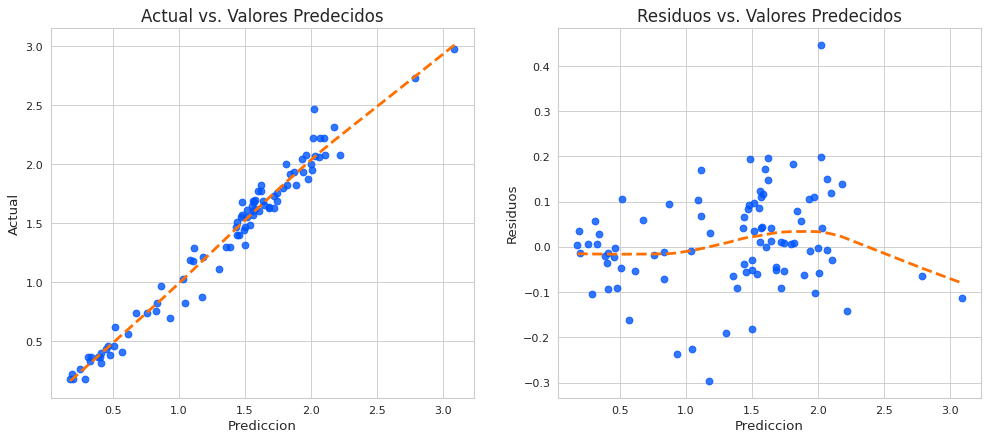

In [222]:
linear_assumption(final_model, X_test, y_test)

#### **Supuesto 2 - Normalidad de los residuos**


P-value de la prueba (por debajo de 0,05 generalmente significa anormal):   0.119614
Los residuos se distribuyen normalmente. Supuesto satisfecho.


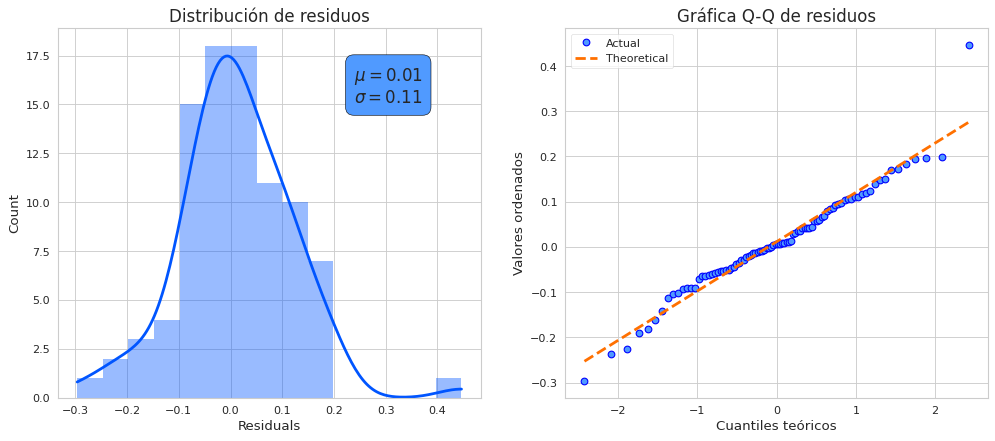

In [223]:
normal_errors_assumption(final_model, X_test, y_test)

#### **Supuesto 3: No hay multicolinealidad perfecta**

In [224]:
X_poly_final = X_poly[final_coef.index]
multicollinearity_assumption(X_poly_final)

8 casos de posible multicolinealidad.
0 casos de multicolinealidad definida.
==> Supuesto posiblemente satisfecho.


vif
Present_Price                                       65.80
Seller_Type_Individual                              15.37
Present_Price^2 Kms_Driven^2                        88.94
Present_Price^2 Kms_Driven Fuel_Type_Diesel         41.74
Present_Price Kms_Driven^3                          70.88
Present_Price Kms_Driven^2 Fuel_Type_Diesel         39.61
Present_Price Kms_Driven^2 Transmission_Manual       9.22
Present_Price Kms_Driven Owner Fuel_Type_Diesel      1.03
Present_Price Kms_Driven Seller_Type_Individual...   5.99
Kms_Driven^2 Seller_Type_Individual Transmissio...   5.51
Age^4                                               82.13
Age^3 Transmission_Manual                           20.47

#### **Supuesto 4: No hay autocorrelación de residuos**

In [225]:
autocorrelation_assumption(final_model, X_test, y_test)

Durbin-Watson: 2.054
Poca o ninguna autocorrelación. Supuesto satisfecho. 



#### **Supuesto 5 - Homoscedasticidad**

La línea naranja debe ser plana:


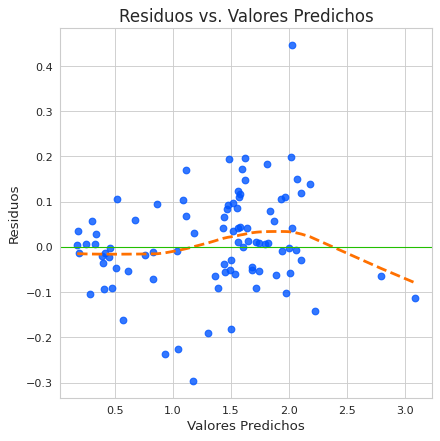

In [226]:
homoscedasticity_assumption(final_model, X_test, y_test)

Todos los supuestos de regresión se cumplen en los datos de la prueba.

# Visualización de resultados

Nuevamente comparamos los valores objetivo reales y los predichos por el modelo final para los datos de prueba:

In [227]:
from scipy.special import inv_boxcox

In [228]:
y_test_pred = final_model.predict(X_test)
y_test_pred = inv_boxcox(y_test_pred, fitted_lambda['Selling_Price']) - 1

In [229]:
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

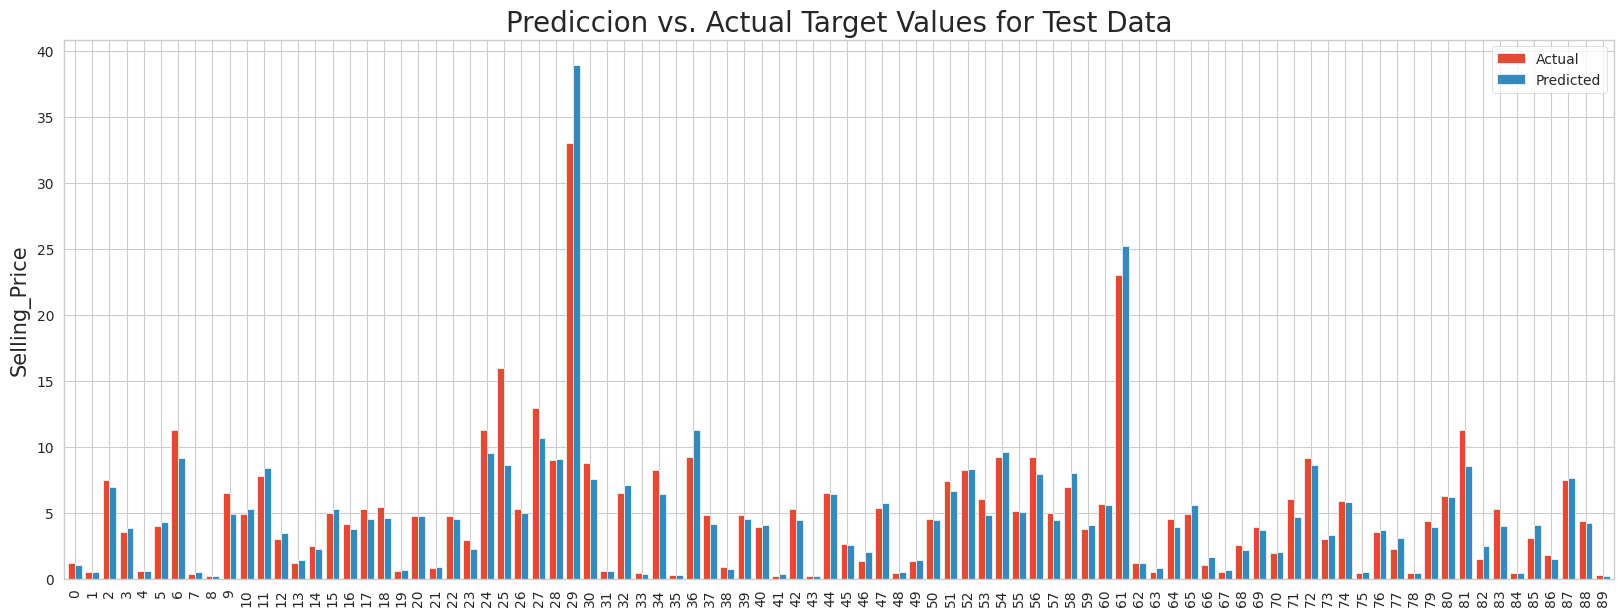

In [230]:
compare_plot(df_comp)

Como podemos ver en el gráfico de barras anterior, no solo la diferencia entre los valores predichos y los valores reales ha disminuido en comparación con el modelo lineal original, sino que, por otro lado, casi no se predice ningún valor negativo para Precio_Venta, ¡lo cual es maravilloso!

# Conclusión

De todos los modelos de regresión, el modelo "Elastic-Net" tiene el mejor rendimiento en este conjunto de datos.

El modelo sólo contiene 11 variables independientes cuyos coeficientes en el modelo son:

In [231]:
final_coef.reset_index().replace(' ',' . ', regex=True).set_index('index')

Final Model Coef.
index                                                                
Present_Price                                                0.681004
Seller_Type_Individual                                      -0.081440
Present_Price^2 . Kms_Driven^2                              -0.116517
Present_Price^2 . Kms_Driven . Fuel_Type_Diesel              0.047361
Present_Price . Kms_Driven^3                                -0.053360
Present_Price . Kms_Driven^2 . Fuel_Type_Diesel              0.046955
Present_Price . Kms_Driven^2 . Transmission_Manual          -0.010262
Present_Price . Kms_Driven . Owner . Fuel_Type_...          -0.003578
Present_Price . Kms_Driven . Seller_Type_Indivi...           0.011524
Kms_Driven^2 . Seller_Type_Individual . Transmi...           0.003629
Age^4                                                       -0.117548
Age^3 . Transmission_Manual                                 -0.002886

La evaluación del modelo sobre los datos invisibles es la siguiente.

In [232]:
model_scores

Final Model. Test
MAE                0.080827
MSE                0.012020
RMSE               0.109638
R2-Score           0.972462

🏆El modelo satisface todos los supuestos de regresión, incluidos:
- Supuesto 1 - Linealidad
- Supuesto 2 - Normalidad de los Residuos
- Supuesto 3 - No hay multicolinealidad perfecta
- Supuesto 4 - No hay autocorrelación de residuos
- Supuesto 5 - Homoscedasticidad